#  S&P 500 Recovery Pattern Analysis: 1998-99 vs 2025-26

## OVERVIEW

####  Objective
Comprehensive comparison of market recovery patterns between the **1998 Crisis** and **2025 Market Drop**, analyzing whether historical patterns can predict future recovery trajectories.

####  Comparison Periods
- **Historical Benchmark**: 1998-1999 Crisis Recovery (24 months)
- **Current Analysis**: 2025-2026 Market Drop Recovery (actual data + projections)

####  Visualizations (10 Total)



##### Core Comparisons
1. **Price Comparison** - Side-by-side actual prices with date alignment
2. **Normalized Comparison** - Single chart overlay showing percentage changes from crisis point
3. **Dual Timeline Combined** - Dual Y-axis chart comparing absolute price levels

##### Statistical Analysis
4. **Statistical Summary Table** - Key metrics comparison
5. **Daily Returns Distribution** - Volatility analysis
6. **Cumulative Returns** - Progressive performance tracking

##### Technical Analysis
7. **Moving Averages (20/50-day)** - Trend identification
8. **Volume Analysis** - Trading activity patterns
9. **Volatility Comparison** - Risk assessment


In [1]:
# Core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

# Configuration
warnings.filterwarnings('ignore')
RANDOM_SEED = 3407
np.random.seed(RANDOM_SEED)

# Pandas display settings
pd.set_option('display.precision', 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Plotting configuration
sns.set_style('whitegrid')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7.7)
plt.rcParams['font.size'] = 11

print(f"Random seed set to: {RANDOM_SEED}")

Random seed set to: 3407


In [2]:
# Define crisis dates and analysis period
CRISIS_1998 = '1998-10-08' #trough date
CRISIS_2025 = '2025-04-08' #trough date
MONTHS_TO_ANALYZE = 24
TRADING_DAYS_PER_MONTH = 21
PRIOR_DAYS = 57

# Fetch S&P 500 historical data
print("Fetching S&P 500 data...")
try:
    ticker = yf.Ticker('^GSPC')
    hist = ticker.history(start='1997-01-01', auto_adjust=True, prepost=False)
    
    if hist.empty:
        raise ValueError("No data retrieved from Yahoo Finance")
    
    if hist.index.tz is not None:
        hist.index = hist.index.tz_localize(None)
    
    print(f"Data fetched: {hist.index[0]} to {hist.index[-1]}")
    print(f"Total records: {len(hist)}\n")
    
except Exception as e:
    print(f"Error fetching data: {e}")
    raise

Fetching S&P 500 data...
Data fetched: 1997-01-02 00:00:00 to 2025-12-26 00:00:00
Total records: 7293



In [3]:
# Helper Functions
def get_period_after_date(df, start_date, months=18, prior_days=37):
    """Extract data for specified months after a given date."""
    start = pd.to_datetime(start_date)
    trading_days = months * TRADING_DAYS_PER_MONTH
    
    mask = df.index <= start
    period_data = df.loc[mask]
    start0 = period_data.iloc[-prior_days:].index[0]
    print("Analysis Start Date: ", start0)
    mask = df.index >= start0
    period_data = df.loc[mask]
    
    if len(period_data) > (trading_days + prior_days):
        return period_data.iloc[:(trading_days + prior_days)]
    return period_data


def add_months_from_start(df, start_date):
    """Add column showing months elapsed from start date."""
    start = pd.to_datetime(start_date)
    df = df.copy()
    days_diff = (df.index - start).days
    df['months_from_start'] = days_diff / 30.44
    return df


def normalize_to_percent(series):
    """Normalize series to percentage change from first valid value."""
    if len(series) == 0:
        return pd.Series(dtype=float)
    
    first_valid_idx = series.first_valid_index()
    if first_valid_idx is None:
        return pd.Series(dtype=float)
    
    first_value = series.loc[first_valid_idx]
    if first_value == 0 or pd.isna(first_value):
        return pd.Series(dtype=float)
    
    return ((series / first_value) - 1) * 100


def calculate_statistics(price_series):
    """Calculate comprehensive statistics for a price series."""
    if len(price_series) == 0:
        return ["N/A"] * 10
    
    start_price = price_series.iloc[0]
    end_price = price_series.iloc[-1]
    min_price = price_series.min()
    max_price = price_series.max()
    
    total_return = ((end_price / start_price) - 1) * 100 if start_price != 0 else 0
    max_drawdown_pct = ((min_price / start_price) - 1) * 100 if start_price != 0 else 0
    max_gain_pct = ((max_price / start_price) - 1) * 100 if start_price != 0 else 0
    
    daily_returns = price_series.pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252) * 100
    
    return [
        start_price, end_price, min_price, max_price,
        total_return, max_drawdown_pct, max_gain_pct,
        price_series.mean(), volatility, len(price_series)
    ]

In [4]:
# Extract both periods
period_1998 = get_period_after_date(hist, CRISIS_1998, MONTHS_TO_ANALYZE, PRIOR_DAYS)
period_2025 = get_period_after_date(hist, CRISIS_2025, MONTHS_TO_ANALYZE, PRIOR_DAYS)

print(f"1998 Crisis Period:")
print(f"  Start: {period_1998.index[0]}")
print(f"  End: {period_1998.index[-1]}")
print(f"  Trading days: {len(period_1998)}\n")

print(f"2025 Crisis Period:")
if len(period_2025) > 0:
    print(f"  Start: {period_2025.index[0]}")
    print(f"  End: {period_2025.index[-1]}")
    print(f"  Trading days: {len(period_2025)}")
else:
    print(f"  No data available yet")
print()

Analysis Start Date:  1998-07-21 00:00:00
Analysis Start Date:  2025-01-16 00:00:00
1998 Crisis Period:
  Start: 1998-07-21 00:00:00
  End: 2000-10-06 00:00:00
  Trading days: 561

2025 Crisis Period:
  Start: 2025-01-16 00:00:00
  End: 2025-12-26 00:00:00
  Trading days: 238



In [5]:
# Pad 2025 data
target_length = len(period_1998)
current_length = len(period_2025)

if current_length > 0 and current_length < target_length:
    last_date = period_2025.index[-1]
    business_days_needed = target_length - current_length
    future_dates = pd.bdate_range(start=last_date + timedelta(days=1), periods=business_days_needed)
    
    padding_df = pd.DataFrame(index=future_dates, columns=period_2025.columns, dtype=float)
    period_2025_padded = pd.concat([period_2025, padding_df])
    
    print(f"2025 Period after padding:")
    print(f"  Total length: {len(period_2025_padded)}")
    print(f"  Actual data: {current_length}")
    print(f"  Padded (future): {business_days_needed}")
    print(f"  Projected end date: {period_2025_padded.index[-1]}\n")
    
elif current_length == 0:
    start_date = pd.to_datetime(CRISIS_2025)
    future_dates = pd.bdate_range(start=start_date, periods=target_length)
    period_2025_padded = pd.DataFrame(index=future_dates, columns=period_1998.columns, dtype=float)
    print(f"2025 Period: No actual data available. Created empty projection.\n")
    
else:
    period_2025_padded = period_2025.iloc[:target_length].copy()
    print(f"2025 Period: Using {len(period_2025_padded)} data points (no padding needed)\n")

# Add months from start
period_1998_with_months = add_months_from_start(period_1998, CRISIS_1998)
period_2025_with_months = add_months_from_start(period_2025_padded, CRISIS_2025)

2025 Period after padding:
  Total length: 561
  Actual data: 238
  Padded (future): 323
  Projected end date: 2027-03-24 00:00:00



## VISUALIZATION 1: Absolute Price Comparison with Actual Dates

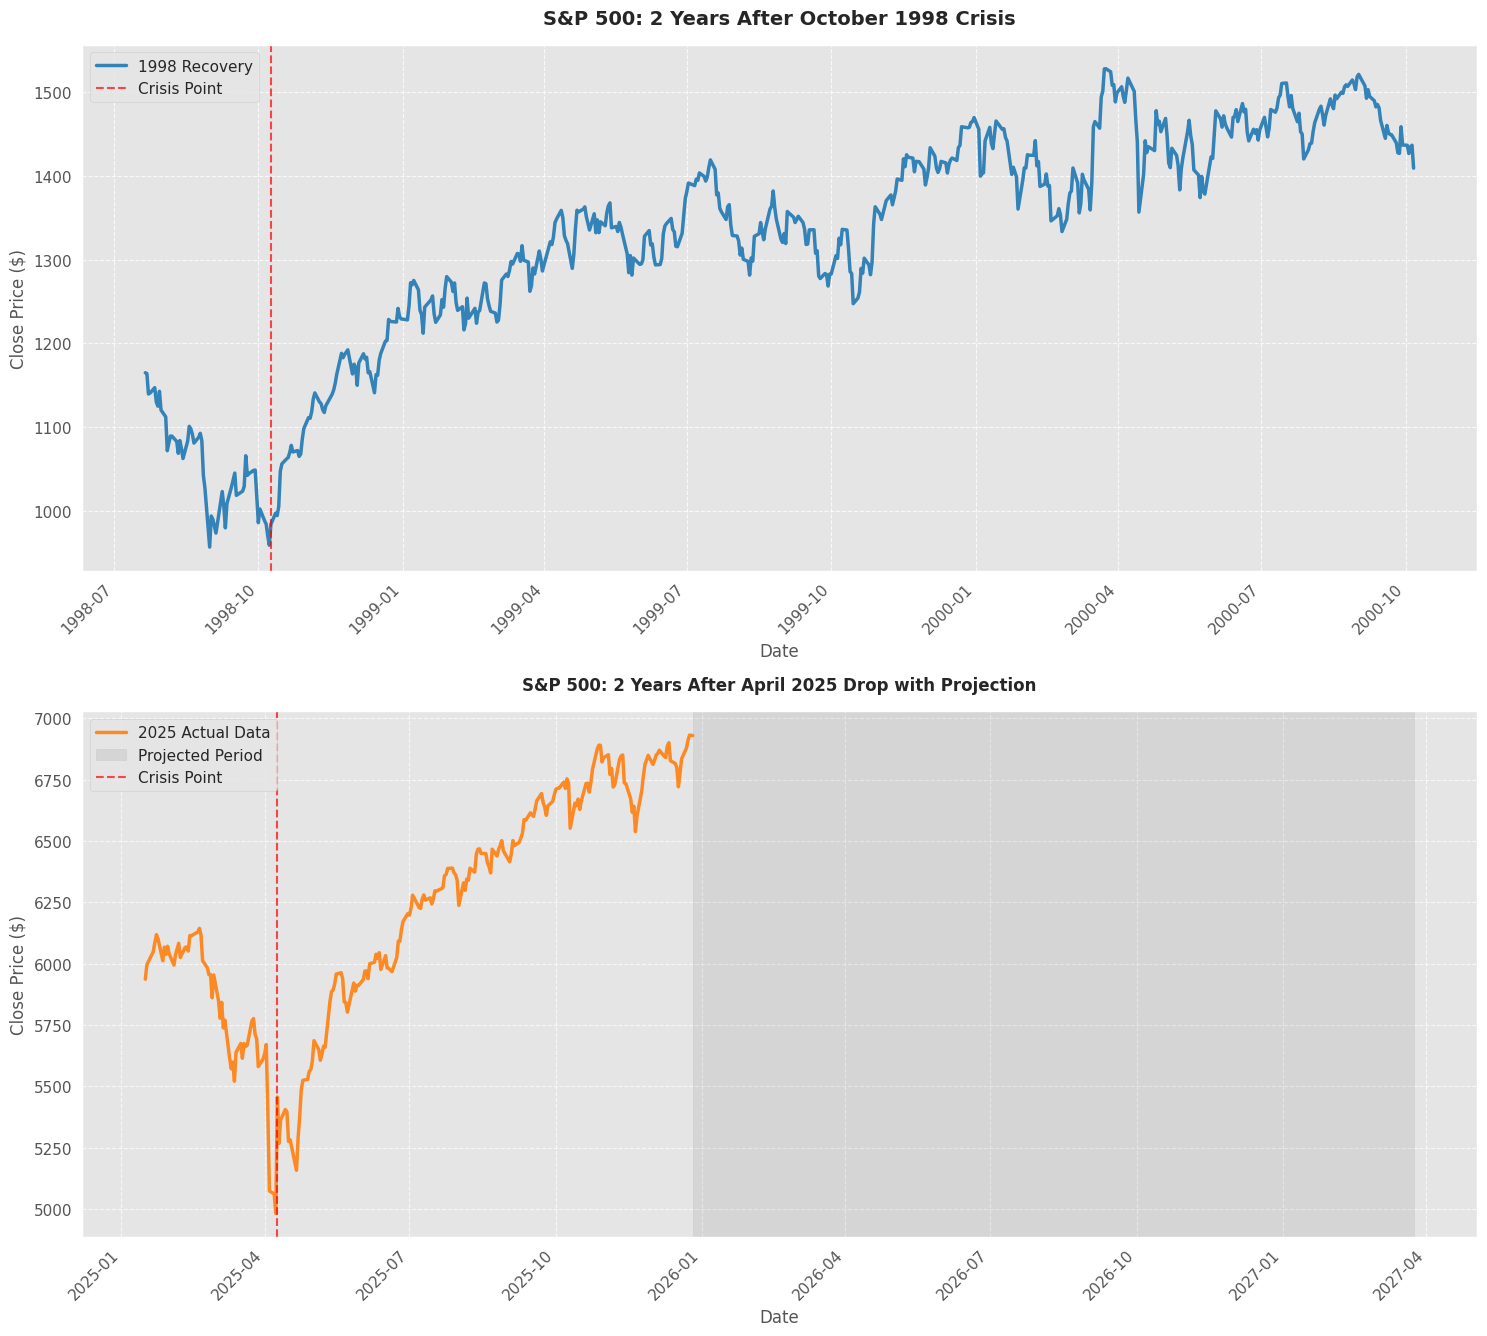

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 13.5))

# Plot 1998 period
ax1.plot(period_1998.index, period_1998['Close'], 
         linewidth=2.5, color='#1f77b4', label='1998 Recovery', alpha=0.9)
ax1.axvline(x=period_1998.index[PRIOR_DAYS], color='red', linestyle='--', 
            linewidth=1.5, alpha=0.7, label='Crisis Point')

ax1.set_title('S&P 500: 2 Years After October 1998 Crisis', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Close Price ($)', fontsize=12)
ax1.grid(True, alpha=0.8, linestyle='--')
ax1.legend(fontsize=11, loc='best')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 2025 period
if current_length > 0:
    actual_mask = ~period_2025_padded['Close'].isna()
    
    ax2.plot(period_2025_padded.index[actual_mask], 
             period_2025_padded.loc[actual_mask, 'Close'], 
             linewidth=2.5, color='#ff7f0e', label='2025 Actual Data', alpha=0.9)
    
    if current_length < target_length:
        projected_start = period_2025.index[-1]
        projected_end = period_2025_padded.index[-1]
        ax2.axvspan(projected_start, projected_end, 
                    alpha=0.15, color='gray', label='Projected Period')
    
    ax2.axvline(x=period_2025_padded.index[PRIOR_DAYS], color='red', linestyle='--', 
                linewidth=1.5, alpha=0.7, label='Crisis Point')
    
    title_suffix = 'with Projection' if current_length < target_length else ''
    ax2.set_title(f'S&P 500: 2 Years After April 2025 Drop {title_suffix}', 
                  fontsize=12, fontweight='bold', pad=15)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Close Price ($)', fontsize=12)
    ax2.grid(True, alpha=0.7, linestyle='--')
    ax2.legend(fontsize=11, loc='best')
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
else:
    ax2.text(0.5, 0.5, 'No data available for 2025 period yet', 
             ha='center', va='center', transform=ax2.transAxes, 
             fontsize=12, color='gray')
    ax2.set_title('S&P 500: 2 Years After February 2025 Drop (No Data)', 
                  fontsize=12, fontweight='bold', pad=15)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Close Price ($)', fontsize=12)

plt.tight_layout()
plt.show()

## VISUALIZATION 2: Normalized Comparison


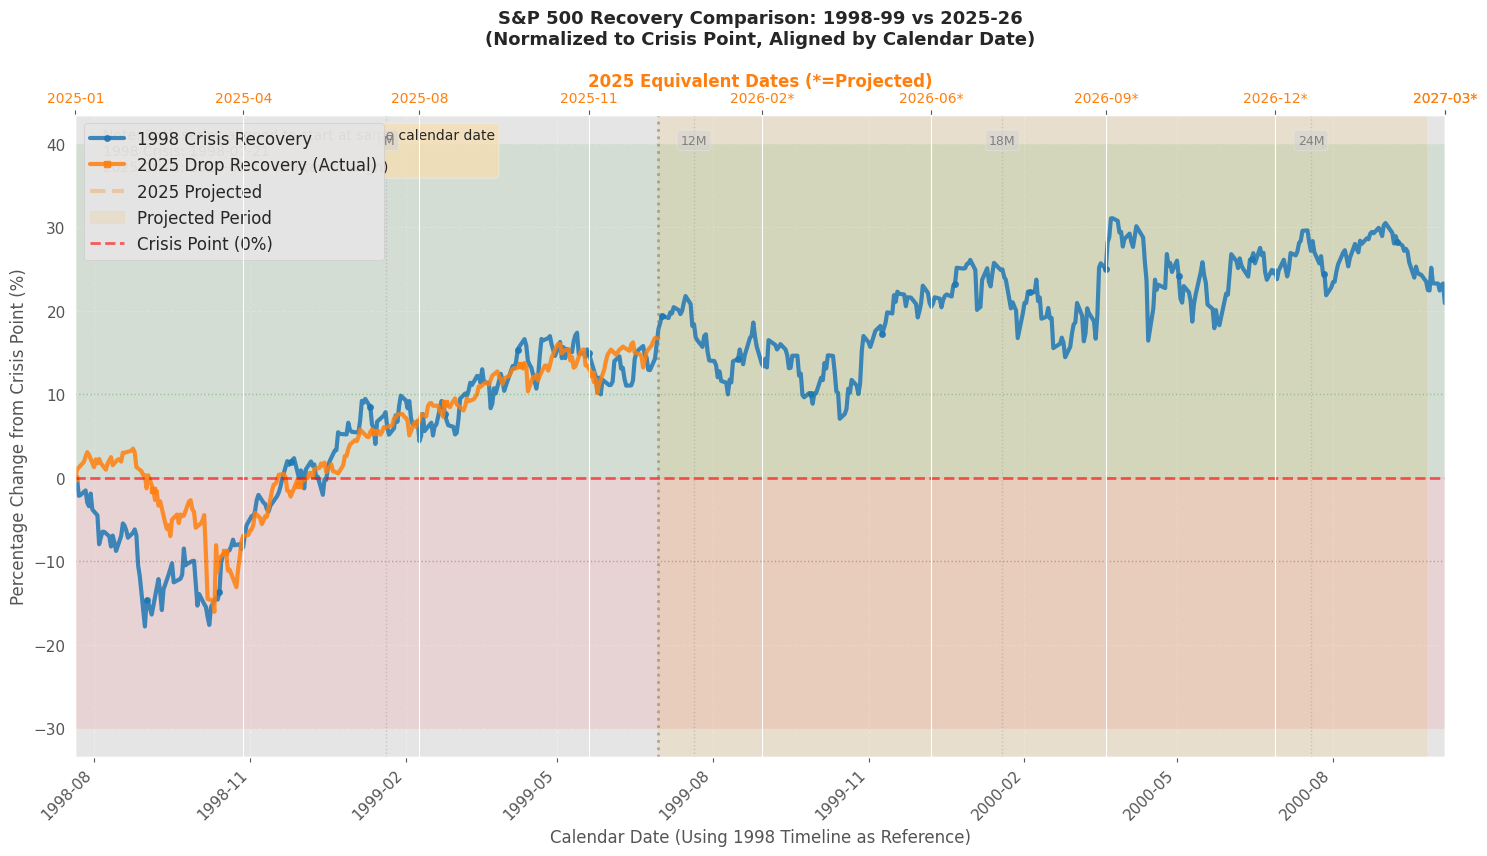

In [7]:
period_1998_norm = normalize_to_percent(period_1998['Close'])
period_2025_norm = normalize_to_percent(period_2025_padded['Close'])

fig, ax = plt.subplots(figsize=(15, 8.7))

# Plot 1998 normalized series using actual dates
if len(period_1998_norm) > 0:
    ax.plot(period_1998.index, period_1998_norm, 
            linewidth=3, color='#1f77b4', label='1998 Crisis Recovery', 
            alpha=0.85, marker='o', markersize=4, markevery=30)

# Plot 2025 data aligned to 1998 dates (shift 2025 to overlay on 1998 timeline)
if current_length > 0 and len(period_2025_norm) > 0:
    actual_mask = ~period_2025_padded['Close'].isna()
    
    # Create aligned dates: shift 2025 data to match 1998 date range
    # This aligns crisis points to the same date for visual comparison
    date_offset = period_1998.index[0] - period_2025_padded.index[0]
    aligned_2025_dates = period_2025_padded.index + date_offset
    
    # Plot actual data
    ax.plot(aligned_2025_dates[actual_mask], 
            period_2025_norm[actual_mask], 
            linewidth=3, color='#ff7f0e', label='2025 Drop Recovery (Actual)', 
            alpha=0.85, marker='s', markersize=4, markevery=30)
    
    # Plot projected continuation if exists
    if current_length < target_length:
        projected_mask = ~actual_mask
        ax.plot(aligned_2025_dates[projected_mask], 
                period_2025_norm[projected_mask], 
                linewidth=3, color='#ff7f0e', alpha=0.3, 
                linestyle='--', label='2025 Projected')
        
        # Highlight projected period
        projected_start = aligned_2025_dates[actual_mask][-1]
        projected_end = aligned_2025_dates[-1]
        ax.axvspan(projected_start, projected_end, 
                   alpha=0.1, color='orange', label='Projected Period')
        
        # Add vertical line at end of actual data
        ax.axvline(x=projected_start, color='gray', linestyle=':', 
                   linewidth=2, alpha=0.6)

# Reference lines
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.6, 
           label='Crisis Point (0%)')
ax.axhline(y=10, color='green', linestyle=':', linewidth=1, alpha=0.3)
ax.axhline(y=-10, color='darkred', linestyle=':', linewidth=1, alpha=0.3)

# Shade negative/positive territory
ax.fill_between(period_1998.index, -30, 0, alpha=0.08, color='red')
ax.fill_between(period_1998.index, 0, 40, alpha=0.08, color='green')

# Title and labels
ax.set_title('S&P 500 Recovery Comparison: 1998-99 vs 2025-26\n(Normalized to Crisis Point, Aligned by Calendar Date)', 
             fontsize=13, fontweight='bold', pad=20)
ax.set_xlabel('Calendar Date (Using 1998 Timeline as Reference)', fontsize=12)
ax.set_ylabel('Percentage Change from Crisis Point (%)', fontsize=12)

# Grid and legend
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=12, loc='best', framealpha=0.95)

# Format x-axis with 1998 dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax.set_xlim(period_1998.index[0], period_1998.index[-1])

# Add secondary x-axis showing 2025 dates
if current_length > 0:
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    
    # Create tick positions matching the bottom axis
    tick_positions_1998 = []
    tick_labels_2025 = []
    
    for i in range(0, len(period_1998), len(period_1998)//8):  # ~8 ticks
        if i < len(aligned_2025_dates):
            tick_positions_1998.append(mdates.date2num(period_1998.index[i]))
            
            # Find corresponding 2025 date
            if i < len(period_2025_padded):
                date_2025 = period_2025_padded.index[i]
                label_2025 = date_2025.strftime('%Y-%m')
                if i >= current_length:
                    label_2025 += '*'  # Mark projected dates
                tick_labels_2025.append(label_2025)
            else:
                tick_labels_2025.append('')
    
    # Add the last date
    if len(period_1998) > 0 and len(period_2025_padded) > 0:
        tick_positions_1998.append(mdates.date2num(period_1998.index[-1]))
        last_label = period_2025_padded.index[-1].strftime('%Y-%m')
        if len(period_2025_padded) - 1 >= current_length:
            last_label += '*'
        tick_labels_2025.append(last_label)
    
    ax2.set_xticks(tick_positions_1998)
    ax2.set_xticklabels(tick_labels_2025, fontsize=10)
    ax2.set_xlabel('2025 Equivalent Dates (*=Projected)', fontsize=12, 
                   color='#ff7f0e', fontweight='bold')
    ax2.tick_params(axis='x', labelcolor='#ff7f0e')

# Add annotation box explaining the alignment
textstr = 'Note: Both series aligned to start at same calendar date\n'
textstr += f'1998 Crisis: {period_1998.index[0].strftime("%Y-%m-%d")}\n'
if current_length > 0:
    textstr += f'2025 Crisis: {period_2025_padded.index[0].strftime("%Y-%m-%d")} (shifted to align)'
    
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

# Add milestone markers every 6 months
for month in [6, 12, 18, 24]:
    idx = min(month * TRADING_DAYS_PER_MONTH, len(period_1998) - 1)
    if idx < len(period_1998):
        date = period_1998.index[idx]
        ax.axvline(x=date, color='gray', linestyle=':', linewidth=1, alpha=0.3)
        
        # Add month label
        ax.text(date, ax.get_ylim()[1] * 0.92, f'{month}M', 
                ha='center', fontsize=9, color='gray',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.show()


## VISUALIZATION 3: Dual Timeline with Synchronized Axes


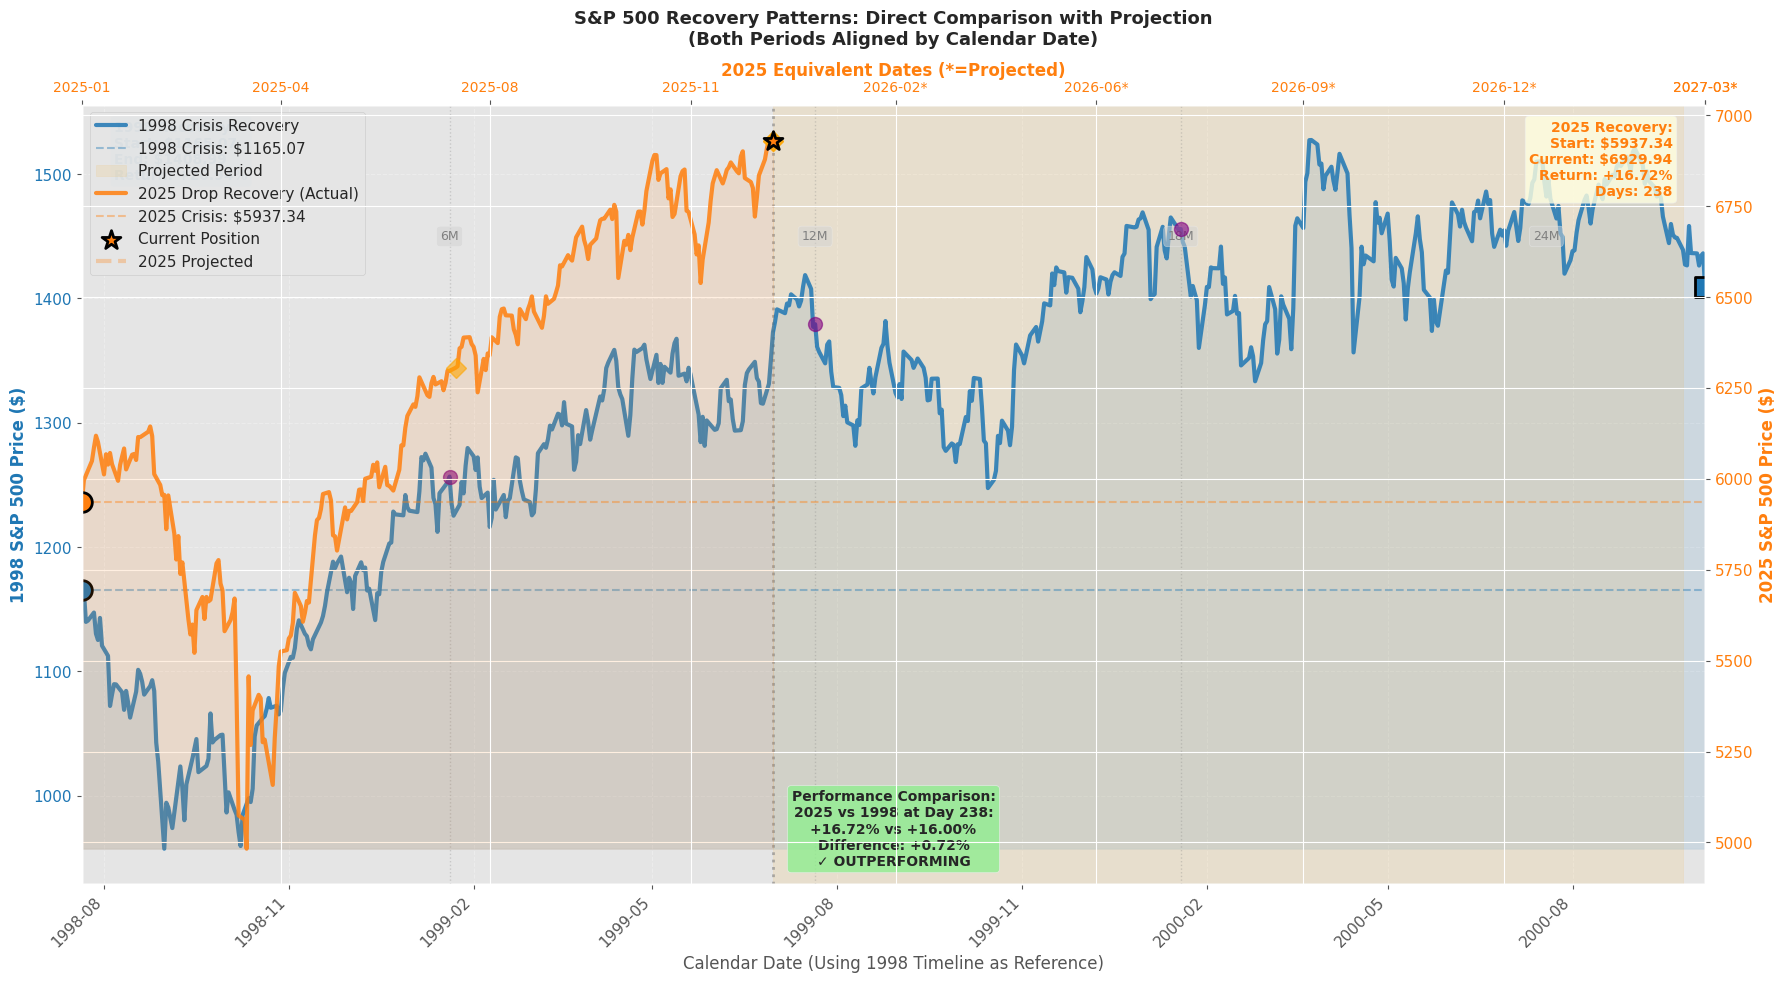

In [8]:
fig, ax1 = plt.subplots(figsize=(18, 10))

# Calculate statistics
min_val_1998, max_val_1998 = period_1998['Close'].min(), period_1998['Close'].max()

# Plot 1998 with actual dates
ax1.plot(period_1998.index, period_1998['Close'], 
         linewidth=3, color='#1f77b4', label='1998 Crisis Recovery', alpha=0.85, zorder=3)
ax1.fill_between(period_1998.index, period_1998['Close'], 
                 min_val_1998, alpha=0.12, color='#1f77b4')

crisis_price_1998 = period_1998['Close'].iloc[0]
recovery_price_1998 = period_1998['Close'].iloc[-1]

ax1.axhline(y=crisis_price_1998, color='#1f77b4', linestyle='--', 
           linewidth=1.5, alpha=0.4, label=f'1998 Crisis: ${crisis_price_1998:.2f}')

ax1.scatter([period_1998.index[0]], [crisis_price_1998], 
           color='#1f77b4', s=200, zorder=5, edgecolors='black', linewidth=2, marker='o')
ax1.scatter([period_1998.index[-1]], [recovery_price_1998], 
           color='#1f77b4', s=200, zorder=5, edgecolors='black', linewidth=2, marker='s')

return_1998 = ((recovery_price_1998 / crisis_price_1998) - 1) * 100

# Add milestone markers for 1998
for month in [6, 12, 18]:
    idx = min(month * TRADING_DAYS_PER_MONTH, len(period_1998) - 1)
    date = period_1998.index[idx]
    price = period_1998['Close'].iloc[idx]
    ax1.axvline(x=date, color='gray', linestyle=':', linewidth=1, alpha=0.3)
    ax1.plot(date, price, 'o', color='purple', markersize=10, zorder=4, alpha=0.6)

# Set up first y-axis
ax1.set_xlabel('Calendar Date (Using 1998 Timeline as Reference)', fontsize=12)
ax1.set_ylabel('1998 S&P 500 Price ($)', fontsize=12, color='#1f77b4', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.grid(True, alpha=0.3, linestyle='--')

# Format x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.set_xlim(period_1998.index[0], period_1998.index[-1])

# Create second y-axis for 2025 data
ax2 = ax1.twinx()

# Plot 2025 data aligned to 1998 dates
if current_length > 0:
    actual_mask = ~period_2025_padded['Close'].isna()
    
    # Align 2025 dates to 1998 timeline
    date_offset = period_1998.index[0] - period_2025_padded.index[0]
    aligned_2025_dates = period_2025_padded.index + date_offset
    
    min_val_2025 = period_2025_padded.loc[actual_mask, 'Close'].min()
    max_val_2025 = period_2025_padded.loc[actual_mask, 'Close'].max()
    
    # Plot actual 2025 data
    ax2.plot(aligned_2025_dates[actual_mask], 
            period_2025_padded.loc[actual_mask, 'Close'], 
            linewidth=3, color='#ff7f0e', label='2025 Drop Recovery (Actual)', 
            alpha=0.85, zorder=3)
    ax2.fill_between(aligned_2025_dates[actual_mask], 
                     period_2025_padded.loc[actual_mask, 'Close'], 
                     min_val_2025, alpha=0.12, color='#ff7f0e')
    
    crisis_price_2025 = period_2025_padded.loc[actual_mask, 'Close'].iloc[0]
    current_price_2025 = period_2025_padded.loc[actual_mask, 'Close'].iloc[-1]
    
    ax2.axhline(y=crisis_price_2025, color='#ff7f0e', linestyle='--', 
               linewidth=1.5, alpha=0.4, label=f'2025 Crisis: ${crisis_price_2025:.2f}')
    
    ax2.scatter([aligned_2025_dates[actual_mask][0]], [crisis_price_2025], 
               color='#ff7f0e', s=200, zorder=5, edgecolors='black', linewidth=2, marker='o')
    ax2.scatter([aligned_2025_dates[actual_mask][-1]], [current_price_2025], 
               color='#ff7f0e', s=200, zorder=5, edgecolors='black', linewidth=2, 
               marker='*', label='Current Position')
    
    return_2025 = ((current_price_2025 / crisis_price_2025) - 1) * 100
    
    # Plot projected continuation if exists
    if current_length < target_length:
        projected_mask = ~actual_mask
        ax2.plot(aligned_2025_dates[projected_mask], 
                period_2025_padded.loc[projected_mask, 'Close'], 
                linewidth=3, color='#ff7f0e', alpha=0.3, 
                linestyle='--', label='2025 Projected', zorder=2)
        
        # Highlight projected period
        projected_start = aligned_2025_dates[actual_mask][-1]
        projected_end = aligned_2025_dates[-1]
        ax1.axvspan(projected_start, projected_end, 
                   alpha=0.1, color='orange', label='Projected Period', zorder=1)
        
        ax1.axvline(x=projected_start, color='gray', linestyle=':', 
                   linewidth=2, alpha=0.6, zorder=2)
    
    # Add milestone markers for 2025 (only for actual data)
    for month in [6, 12, 18]:
        idx = min(month * TRADING_DAYS_PER_MONTH, current_length - 1)
        if idx > 0 and idx < len(aligned_2025_dates):
            if actual_mask[idx]:
                date = aligned_2025_dates[idx]
                price = period_2025_padded.iloc[idx]['Close']
                ax2.plot(date, price, 'D', color='orange', markersize=10, zorder=4, alpha=0.6)
    
    # Set up second y-axis
    ax2.set_ylabel('2025 S&P 500 Price ($)', fontsize=12, color='#ff7f0e', fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Add title
title_suffix = ' with Projection' if current_length > 0 and current_length < target_length else ''
fig.suptitle(f'S&P 500 Recovery Patterns: Direct Comparison{title_suffix}\n(Both Periods Aligned by Calendar Date)', 
             fontsize=13, fontweight='bold', y=0.98)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
if current_length > 0:
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, 
              fontsize=11, loc='upper left', framealpha=0.95)
else:
    ax1.legend(lines1, labels1, fontsize=11, loc='upper left', framealpha=0.95)

# Add secondary x-axis showing 2025 dates
if current_length > 0:
    ax3 = ax1.twiny()
    ax3.set_xlim(ax1.get_xlim())
    
    # Create tick positions
    tick_positions_1998 = []
    tick_labels_2025 = []
    
    for i in range(0, len(period_1998), len(period_1998)//8):
        if i < len(aligned_2025_dates):
            tick_positions_1998.append(mdates.date2num(period_1998.index[i]))
            
            if i < len(period_2025_padded):
                date_2025 = period_2025_padded.index[i]
                label_2025 = date_2025.strftime('%Y-%m')
                if i >= current_length:
                    label_2025 += '*'
                tick_labels_2025.append(label_2025)
            else:
                tick_labels_2025.append('')
    
    # Add last date
    if len(period_1998) > 0 and len(period_2025_padded) > 0:
        tick_positions_1998.append(mdates.date2num(period_1998.index[-1]))
        last_label = period_2025_padded.index[-1].strftime('%Y-%m')
        if len(period_2025_padded) - 1 >= current_length:
            last_label += '*'
        tick_labels_2025.append(last_label)
    
    ax3.set_xticks(tick_positions_1998)
    ax3.set_xticklabels(tick_labels_2025, fontsize=10)
    ax3.set_xlabel('2025 Equivalent Dates (*=Projected)', fontsize=12, 
                   color='#ff7f0e', fontweight='bold')
    ax3.tick_params(axis='x', labelcolor='#ff7f0e')

# Add annotation boxes
if current_length > 0:
    # 1998 stats box
    textstr_1998 = f'1998 Recovery:\n'
    textstr_1998 += f'Start: ${crisis_price_1998:.2f}\n'
    textstr_1998 += f'End: ${recovery_price_1998:.2f}\n'
    textstr_1998 += f'Return: {return_1998:+.2f}%'
    
    props1 = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
    ax1.text(0.02, 0.98, textstr_1998, transform=ax1.transAxes, fontsize=10,
            verticalalignment='top', bbox=props1, color='#1f77b4', fontweight='bold')
    
    # 2025 stats box
    textstr_2025 = f'2025 Recovery:\n'
    textstr_2025 += f'Start: ${crisis_price_2025:.2f}\n'
    textstr_2025 += f'Current: ${current_price_2025:.2f}\n'
    textstr_2025 += f'Return: {return_2025:+.2f}%\n'
    textstr_2025 += f'Days: {current_length}'
    
    props2 = dict(boxstyle='round', facecolor='lightyellow', alpha=0.8)
    ax1.text(0.98, 0.98, textstr_2025, transform=ax1.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right', bbox=props2, 
            color='#ff7f0e', fontweight='bold')
    
    # Comparison box
    equivalent_1998_idx = min(current_length - 1, len(period_1998) - 1)
    equivalent_1998_return = ((period_1998['Close'].iloc[equivalent_1998_idx] / crisis_price_1998) - 1) * 100
    performance_diff = return_2025 - equivalent_1998_return
    
    textstr_compare = f'Performance Comparison:\n'
    textstr_compare += f'2025 vs 1998 at Day {current_length}:\n'
    textstr_compare += f'{return_2025:+.2f}% vs {equivalent_1998_return:+.2f}%\n'
    textstr_compare += f'Difference: {performance_diff:+.2f}%\n'
    if performance_diff > 0:
        textstr_compare += '✓ OUTPERFORMING'
        box_color = 'lightgreen'
    else:
        textstr_compare += '⚠ UNDERPERFORMING'
        box_color = 'lightsalmon'
    
    props3 = dict(boxstyle='round', facecolor=box_color, alpha=0.8)
    ax1.text(0.5, 0.02, textstr_compare, transform=ax1.transAxes, fontsize=10,
            verticalalignment='bottom', horizontalalignment='center', bbox=props3, 
            fontweight='bold')

# Add month markers
for month in [6, 12, 18, 24]:
    idx = min(month * TRADING_DAYS_PER_MONTH, len(period_1998) - 1)
    if idx < len(period_1998):
        date = period_1998.index[idx]
        y_pos = ax1.get_ylim()[1] * 0.93
        ax1.text(date, y_pos, f'{month}M', 
                ha='center', fontsize=9, color='gray',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.show()



In [9]:

# Print alignment info
print("\n" + "=" * 80)
print("VISUALIZATION 3: SINGLE CHART DUAL Y-AXIS ALIGNMENT")
print("=" * 80)
print(f"\nAlignment Strategy:")
print(f"  • Both series start at the same calendar date: {period_1998.index[0].strftime('%Y-%m-%d')}")
print(f"  • 1998 prices shown on LEFT y-axis (blue)")
print(f"  • 2025 prices shown on RIGHT y-axis (orange)")
print(f"  • Direct visual comparison of recovery patterns")

print(f"\n1998 Recovery (Blue):")
print(f"  Date Range: {period_1998.index[0].strftime('%Y-%m-%d')} to {period_1998.index[-1].strftime('%Y-%m-%d')}")
print(f"  Price Range: ${min_val_1998:.2f} - ${max_val_1998:.2f}")
print(f"  Total Return: {return_1998:+.2f}%")

if current_length > 0:
    print(f"\n2025 Recovery (Orange):")
    print(f"  Original Dates: {period_2025_padded.index[0].strftime('%Y-%m-%d')} to {period_2025_padded.index[-1].strftime('%Y-%m-%d')}")
    print(f"  Aligned Dates: {aligned_2025_dates[0].strftime('%Y-%m-%d')} to {aligned_2025_dates[-1].strftime('%Y-%m-%d')}")
    print(f"  Price Range: ${min_val_2025:.2f} - ${max_val_2025:.2f}")
    print(f"  Return to Date: {return_2025:+.2f}%")
    print(f"  Actual Data: {current_length} days (~{current_length/21:.1f} months)")
    
    print(f"\n Direct Comparison at Day {current_length}:")
    print(f"  • 2025: {return_2025:+.2f}%")
    print(f"  • 1998: {equivalent_1998_return:+.2f}%")
    print(f"  • Difference: {performance_diff:+.2f}% {'✓ Outperforming' if performance_diff > 0 else '⚠ Underperforming'}")

print("=" * 80 + "\n")


VISUALIZATION 3: SINGLE CHART DUAL Y-AXIS ALIGNMENT

Alignment Strategy:
  • Both series start at the same calendar date: 1998-07-21
  • 1998 prices shown on LEFT y-axis (blue)
  • 2025 prices shown on RIGHT y-axis (orange)
  • Direct visual comparison of recovery patterns

1998 Recovery (Blue):
  Date Range: 1998-07-21 to 2000-10-06
  Price Range: $957.28 - $1527.46
  Total Return: +20.94%

2025 Recovery (Orange):
  Original Dates: 2025-01-16 to 2027-03-24
  Aligned Dates: 1998-07-21 to 2000-09-25
  Price Range: $4982.77 - $6932.05
  Return to Date: +16.72%
  Actual Data: 238 days (~11.3 months)

 Direct Comparison at Day 238:
  • 2025: +16.72%
  • 1998: +16.00%
  • Difference: +0.72% ✓ Outperforming



## VISUALIZATION 4: Overlay Comparison with Dual Y-Axes

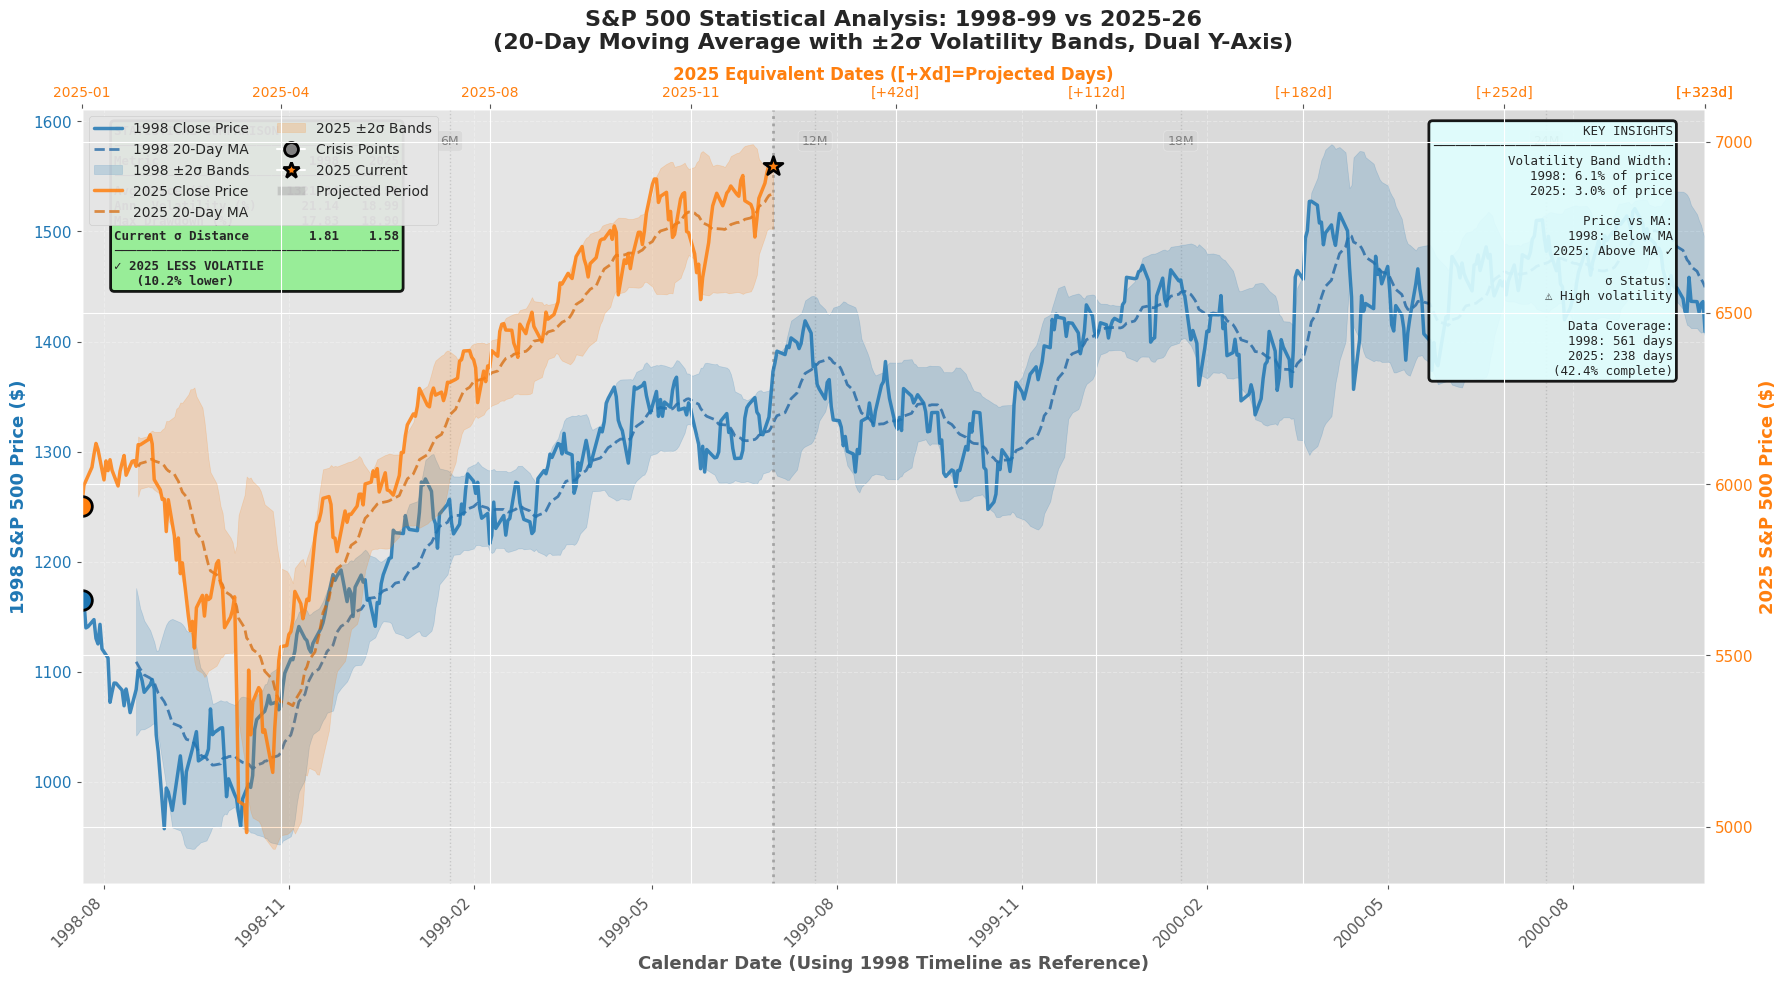

In [10]:
# %% [code]
# ============================================================================
# VISUALIZATION 4: Statistical Summary Comparison (REFINED - Dual Y-Axis, Date Aligned)
# ============================================================================

# Calculate rolling statistics for both periods
window = 20  # 20-day rolling window

# 1998 Statistics
rolling_mean_1998 = period_1998['Close'].rolling(window=window).mean()
rolling_std_1998 = period_1998['Close'].rolling(window=window).std()
upper_band_1998 = rolling_mean_1998 + (2 * rolling_std_1998)
lower_band_1998 = rolling_mean_1998 - (2 * rolling_std_1998)

# 2025 Statistics (only actual data)
if current_length > 0:
    actual_mask = ~period_2025_padded['Close'].isna()
    period_2025_actual = period_2025_padded[actual_mask].copy()
    
    rolling_mean_2025 = period_2025_actual['Close'].rolling(window=window).mean()
    rolling_std_2025 = period_2025_actual['Close'].rolling(window=window).std()
    upper_band_2025 = rolling_mean_2025 + (2 * rolling_std_2025)
    lower_band_2025 = rolling_mean_2025 - (2 * rolling_std_2025)
    
    # Align 2025 dates to 1998 timeline
    date_offset = period_1998.index[0] - period_2025_actual.index[0]
    aligned_2025_dates = period_2025_actual.index + date_offset

# Create figure with dual y-axis
fig, ax1 = plt.subplots(figsize=(18, 10))

# ============================================================================
# LEFT Y-AXIS: 1998 Data (Blue)
# ============================================================================
ax1.plot(period_1998.index, period_1998['Close'], 
         linewidth=2.5, color='#1f77b4', label='1998 Close Price', alpha=0.85, zorder=3)
ax1.plot(period_1998.index, rolling_mean_1998, 
         linewidth=2, color='#0d5a9e', label='1998 20-Day MA', 
         linestyle='--', alpha=0.7, zorder=2)

ax1.fill_between(period_1998.index, upper_band_1998, lower_band_1998, 
                 alpha=0.2, color='#1f77b4', label='1998 ±2σ Bands', zorder=1)

# Crisis point marker for 1998
crisis_price_1998 = period_1998['Close'].iloc[0]
ax1.scatter([period_1998.index[0]], [crisis_price_1998], 
            color='#1f77b4', s=200, zorder=5, edgecolors='black', 
            linewidth=2, marker='o')

# Set up left y-axis
ax1.set_xlabel('Calendar Date (Using 1998 Timeline as Reference)', fontsize=13, fontweight='bold')
ax1.set_ylabel('1998 S&P 500 Price ($)', fontsize=13, color='#1f77b4', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#1f77b4', labelsize=11)
ax1.grid(True, alpha=0.3, linestyle='--', zorder=0)

# Format x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.set_xlim(period_1998.index[0], period_1998.index[-1])

# ============================================================================
# RIGHT Y-AXIS: 2025 Data (Orange)
# ============================================================================
ax2 = ax1.twinx()

if current_length > 0:
    ax2.plot(aligned_2025_dates, period_2025_actual['Close'], 
             linewidth=2.5, color='#ff7f0e', label='2025 Close Price', alpha=0.85, zorder=3)
    ax2.plot(aligned_2025_dates, rolling_mean_2025, 
             linewidth=2, color='#d66400', label='2025 20-Day MA', 
             linestyle='--', alpha=0.7, zorder=2)
    
    ax2.fill_between(aligned_2025_dates, upper_band_2025, lower_band_2025, 
                     alpha=0.2, color='#ff7f0e', label='2025 ±2σ Bands', zorder=1)
    
    # Crisis point marker for 2025
    crisis_price_2025 = period_2025_actual['Close'].iloc[0]
    ax2.scatter([aligned_2025_dates[0]], [crisis_price_2025], 
                color='#ff7f0e', s=200, zorder=5, edgecolors='black', 
                linewidth=2, marker='o')
    
    # Mark current position
    current_price_2025 = period_2025_actual['Close'].iloc[-1]
    ax2.scatter([aligned_2025_dates[-1]], [current_price_2025], 
                color='#ff7f0e', s=200, zorder=5, edgecolors='black', 
                linewidth=2, marker='*')
    
    # Mark end of actual data and projected period
    if current_length < target_length:
        last_actual_date = aligned_2025_dates[-1]
        ax1.axvline(x=last_actual_date, color='gray', linestyle=':', 
                    linewidth=2, alpha=0.6, zorder=2)
        
        # Shade projected area
        projected_end = period_1998.index[min(target_length - 1, len(period_1998) - 1)]
        ax1.axvspan(last_actual_date, projected_end, 
                    alpha=0.1, color='gray', zorder=0)
    
    # Set up right y-axis
    ax2.set_ylabel('2025 S&P 500 Price ($)', fontsize=13, color='#ff7f0e', fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='#ff7f0e', labelsize=11)

# ============================================================================
# Add milestone markers
# ============================================================================
for month in [6, 12, 18, 24]:
    idx = min(month * TRADING_DAYS_PER_MONTH, len(period_1998) - 1)
    if idx < len(period_1998):
        date = period_1998.index[idx]
        ax1.axvline(x=date, color='gray', linestyle=':', linewidth=1, alpha=0.3, zorder=0)
        ax1.text(date, ax1.get_ylim()[1] * 0.98, f'{month}M', 
                 ha='center', fontsize=9, color='gray',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', alpha=0.6))

# ============================================================================
# Title and Legends
# ============================================================================
fig.suptitle('S&P 500 Statistical Analysis: 1998-99 vs 2025-26\n(20-Day Moving Average with ±2σ Volatility Bands, Dual Y-Axis)', 
             fontsize=16, fontweight='bold', y=0.98)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
if current_length > 0:
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    # Create combined legend
    legend_elements = []
    legend_labels = []
    
    # Add 1998 elements
    legend_elements.extend(lines1[:3])  # Price, MA, Bands
    legend_labels.extend(labels1[:3])
    
    # Add 2025 elements
    legend_elements.extend(lines2[:3])  # Price, MA, Bands
    legend_labels.extend(labels2[:3])
    
    # Add markers
    from matplotlib.lines import Line2D
    legend_elements.append(Line2D([0], [0], marker='o', color='w', 
                                   markerfacecolor='gray', markersize=10, 
                                   markeredgecolor='black', markeredgewidth=2))
    legend_labels.append('Crisis Points')
    
    legend_elements.append(Line2D([0], [0], marker='*', color='w', 
                                   markerfacecolor='#ff7f0e', markersize=12, 
                                   markeredgecolor='black', markeredgewidth=2))
    legend_labels.append('2025 Current')
    
    if current_length < target_length:
        from matplotlib.patches import Patch
        legend_elements.append(Patch(facecolor='gray', alpha=0.3))
        legend_labels.append('Projected Period')
    
    ax1.legend(legend_elements, legend_labels, 
               fontsize=10, loc='upper left', framealpha=0.95, ncol=2)
else:
    ax1.legend(lines1, labels1, fontsize=10, loc='upper left', framealpha=0.95)

# ============================================================================
# Add secondary x-axis showing 2025 dates
# ============================================================================
if current_length > 0:
    ax3 = ax1.twiny()
    ax3.set_xlim(ax1.get_xlim())
    
    # Create tick positions
    tick_positions_1998 = []
    tick_labels_2025 = []
    
    for i in range(0, len(period_1998), len(period_1998)//8):
        tick_positions_1998.append(mdates.date2num(period_1998.index[i]))
        
        if i < len(period_2025_actual):
            date_2025 = period_2025_actual.index[i]
            tick_labels_2025.append(date_2025.strftime('%Y-%m'))
        else:
            tick_labels_2025.append(f'[+{i - len(period_2025_actual)}d]')
    
    # Add last date
    if len(period_1998) > 0:
        tick_positions_1998.append(mdates.date2num(period_1998.index[-1]))
        if len(period_2025_actual) > 0:
            days_beyond = len(period_1998) - len(period_2025_actual)
            if days_beyond > 0:
                tick_labels_2025.append(f'[+{days_beyond}d]')
            else:
                tick_labels_2025.append(period_2025_actual.index[-1].strftime('%Y-%m'))
        else:
            tick_labels_2025.append('')
    
    ax3.set_xticks(tick_positions_1998)
    ax3.set_xticklabels(tick_labels_2025, fontsize=10)
    ax3.set_xlabel('2025 Equivalent Dates ([+Xd]=Projected Days)', fontsize=12, 
                   color='#ff7f0e', fontweight='bold')
    ax3.tick_params(axis='x', labelcolor='#ff7f0e')

# ============================================================================
# Calculate and display statistics
# ============================================================================
volatility_1998 = period_1998['Close'].pct_change().std() * np.sqrt(252) * 100
avg_price_1998 = period_1998['Close'].mean()
max_dd_1998 = ((period_1998['Close'].cummax() - period_1998['Close']) / period_1998['Close'].cummax() * 100).max()

if current_length > 0:
    volatility_2025 = period_2025_actual['Close'].pct_change().std() * np.sqrt(252) * 100
    avg_price_2025 = period_2025_actual['Close'].mean()
    max_dd_2025 = ((period_2025_actual['Close'].cummax() - period_2025_actual['Close']) / period_2025_actual['Close'].cummax() * 100).max()
    
    # Create statistics table
    stats_text = 'STATISTICAL COMPARISON\n'
    stats_text += '─' * 38 + '\n'
    stats_text += f'{"Metric":<22} {"1998":>7} {"2025":>7}\n'
    stats_text += '─' * 38 + '\n'
    stats_text += f'{"Avg Price ($)":<22} {avg_price_1998:>7.2f} {avg_price_2025:>7.2f}\n'
    
    volatility_ratio = volatility_2025 / volatility_1998
    stats_text += f'{"Ann. Volatility (%)":<22} {volatility_1998:>7.2f} {volatility_2025:>7.2f}\n'
    stats_text += f'{"Max Drawdown (%)":<22} {max_dd_1998:>7.2f} {max_dd_2025:>7.2f}\n'
    
    # Calculate current σ distances
    if current_length >= window:
        sigma_dist_1998 = abs(rolling_mean_1998.iloc[-1] - period_1998['Close'].iloc[-1]) / rolling_std_1998.iloc[-1]
        sigma_dist_2025 = abs(rolling_mean_2025.iloc[-1] - period_2025_actual['Close'].iloc[-1]) / rolling_std_2025.iloc[-1]
        stats_text += f'{"Current σ Distance":<22} {sigma_dist_1998:>7.2f} {sigma_dist_2025:>7.2f}\n'
    
    stats_text += '─' * 38 + '\n'
    
    if volatility_ratio > 1.1:
        stats_text += '⚠ 2025 MORE VOLATILE\n'
        stats_text += f'   ({(volatility_ratio-1)*100:.1f}% higher)'
        box_color = 'lightsalmon'
    elif volatility_ratio < 0.9:
        stats_text += '✓ 2025 LESS VOLATILE\n'
        stats_text += f'   ({(1-volatility_ratio)*100:.1f}% lower)'
        box_color = 'lightgreen'
    else:
        stats_text += '≈ SIMILAR VOLATILITY\n'
        stats_text += f'   (within 10%)'
        box_color = 'lightyellow'
    
    props = dict(boxstyle='round', facecolor=box_color, alpha=0.9, edgecolor='black', linewidth=2)
    ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, fontsize=9,
             verticalalignment='top', bbox=props, family='monospace',
             fontweight='bold')
    
    # Add key insights box
    insights_text = 'KEY INSIGHTS\n'
    insights_text += '─' * 32 + '\n'
    
    # Band width comparison
    recent_band_width_1998 = (upper_band_1998.iloc[-1] - lower_band_1998.iloc[-1]) / rolling_mean_1998.iloc[-1] * 100 if len(rolling_mean_1998) > 0 else 0
    recent_band_width_2025 = (upper_band_2025.iloc[-1] - lower_band_2025.iloc[-1]) / rolling_mean_2025.iloc[-1] * 100 if len(rolling_mean_2025) > 0 else 0
    
    insights_text += f'Volatility Band Width:\n'
    insights_text += f'  1998: {recent_band_width_1998:.1f}% of price\n'
    insights_text += f'  2025: {recent_band_width_2025:.1f}% of price\n\n'
    
    if current_length >= window:
        insights_text += f'Price vs MA:\n'
        
        # 1998 position
        if period_1998['Close'].iloc[-1] > rolling_mean_1998.iloc[-1]:
            insights_text += f'  1998: Above MA ✓\n'
        else:
            insights_text += f'  1998: Below MA\n'
        
        # 2025 position
        if period_2025_actual['Close'].iloc[-1] > rolling_mean_2025.iloc[-1]:
            insights_text += f'  2025: Above MA ✓\n'
        else:
            insights_text += f'  2025: Below MA\n'
        
        insights_text += f'\nσ Status:\n'
        if sigma_dist_2025 > 1.5:
            insights_text += '  ⚠ High volatility\n'
        elif sigma_dist_2025 < 0.5:
            insights_text += '  ✓ Stabilizing\n'
        else:
            insights_text += '  ≈ Normal range\n'
    
    insights_text += f'\nData Coverage:\n'
    insights_text += f'  1998: {len(period_1998)} days\n'
    insights_text += f'  2025: {current_length} days\n'
    coverage_pct = (current_length / len(period_1998)) * 100
    insights_text += f'  ({coverage_pct:.1f}% complete)'
    
    props2 = dict(boxstyle='round', facecolor='lightcyan', alpha=0.9, edgecolor='black', linewidth=2)
    ax1.text(0.98, 0.98, insights_text, transform=ax1.transAxes, fontsize=9,
             verticalalignment='top', horizontalalignment='right', bbox=props2,
             family='monospace')

plt.tight_layout()
plt.show()



In [11]:
# ============================================================================
# Statistical Summary
# ============================================================================
print("=" * 80)
print("STATISTICAL COMPARISON: 1998-99 vs 2025-26 RECOVERY PERIODS")
print("=" * 80)

stats_1998 = calculate_statistics(period_1998['Close'])

if current_length > 0:
    actual_mask = ~period_2025_padded['Close'].isna()
    period_2025_actual = period_2025_padded.loc[actual_mask, 'Close']
    stats_2025 = calculate_statistics(period_2025_actual)
else:
    stats_2025 = ["N/A"] * 10

print(f"\nData Availability:")
print(f"  1998 Period: {len(period_1998)} trading days")
print(f"  2025 Period: {current_length} actual trading days")
if current_length < target_length and current_length > 0:
    print(f"  2025 Projected: {target_length - current_length} future days padded")
print()

stats_df = pd.DataFrame({
    '1998 Recovery': stats_1998,
    '2025 Recovery (Actual)': stats_2025
}, index=[
    'Starting Price ($)', 'Ending Price ($)', 'Minimum Price ($)',
    'Maximum Price ($)', 'Total Return (%)', 'Max Drawdown (%)',
    'Max Gain from Start (%)', 'Average Price ($)',
    'Annualized Volatility (%)', 'Data Points'
])

print(stats_df.to_string())
print("=" * 80)

if current_length > 0 and stats_2025[0] != "N/A":
    print("\nKey Insights:")
    print(f"  • 1998 recovery showed {stats_1998[4]:.2f}% return over {len(period_1998)} days")
    print(f"  • 2025 recovery shows {stats_2025[4]:.2f}% return over {current_length} days so far")
    
    if stats_1998[4] != "N/A" and stats_2025[4] != "N/A":
        if stats_2025[4] > stats_1998[4]:
            print(f"  • 2025 is OUTPERFORMING 1998 recovery by {stats_2025[4] - stats_1998[4]:.2f}%")
        else:
            print(f"  • 1998 outperformed 2025 recovery by {stats_1998[4] - stats_2025[4]:.2f}%")
    
    if stats_1998[8] != "N/A" and stats_2025[8] != "N/A":
        if stats_2025[8] > stats_1998[8]:
            print(f"  • 2025 period is more volatile ({stats_2025[8]:.2f}% vs {stats_1998[8]:.2f}%)")
        else:
            print(f"  • 1998 period was more volatile ({stats_1998[8]:.2f}% vs {stats_2025[8]:.2f}%)")

print("=" * 80)

STATISTICAL COMPARISON: 1998-99 vs 2025-26 RECOVERY PERIODS

Data Availability:
  1998 Period: 561 trading days
  2025 Period: 238 actual trading days
  2025 Projected: 323 future days padded

                           1998 Recovery  2025 Recovery (Actual)
Starting Price ($)              1,165.07                5,937.34
Ending Price ($)                1,408.99                6,929.94
Minimum Price ($)                 957.28                4,982.77
Maximum Price ($)               1,527.46                6,932.05
Total Return (%)                   20.94                   16.72
Max Drawdown (%)                  -17.83                  -16.08
Max Gain from Start (%)            31.10                   16.75
Average Price ($)               1,321.34                6,220.58
Annualized Volatility (%)          21.14                   18.99
Data Points                       561.00                  238.00

Key Insights:
  • 1998 recovery showed 20.94% return over 561 days
  • 2025 recovery shows 

## VISUALIZATION 5: Daily Returns Distribution Comparison

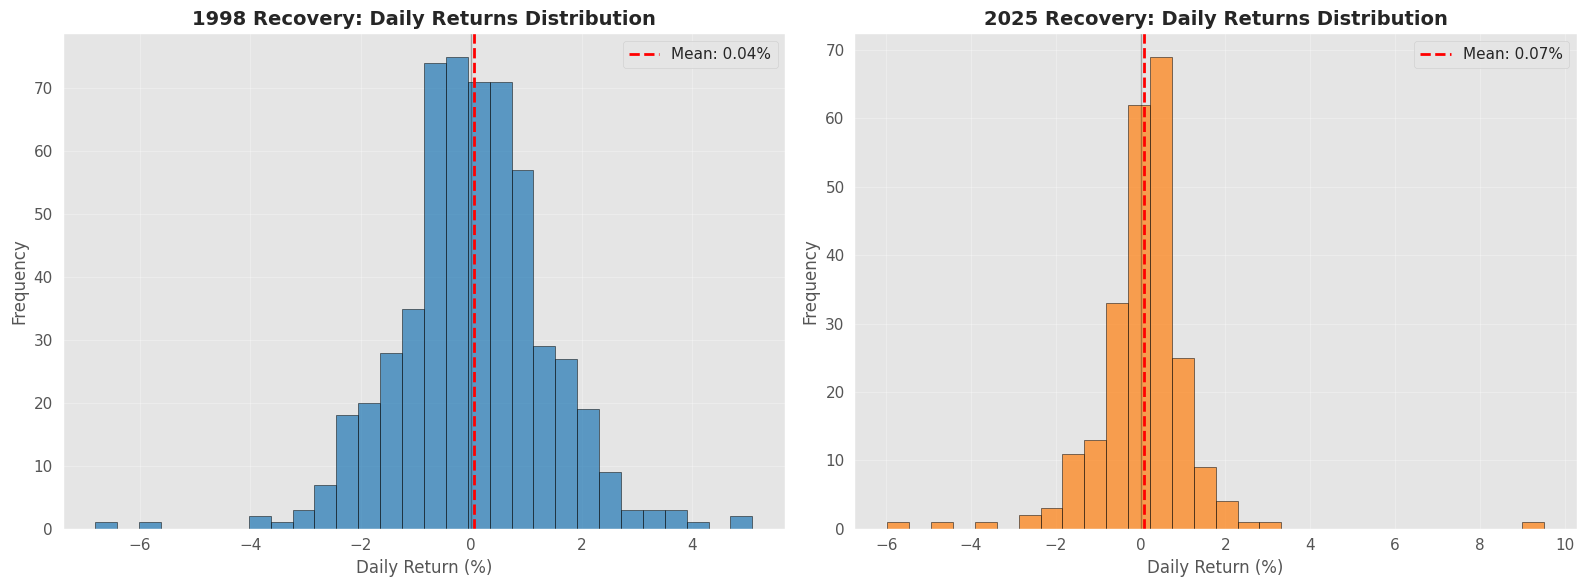

In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

returns_1998 = period_1998['Close'].pct_change().dropna() * 100

if current_length > 1:
    actual_mask = ~period_2025_padded['Close'].isna()
    returns_2025 = period_2025_padded.loc[actual_mask, 'Close'].pct_change().dropna() * 100
else:
    returns_2025 = pd.Series(dtype=float)

# 1998 histogram
ax1.hist(returns_1998, bins=30, color='#1f77b4', alpha=0.7, edgecolor='black')
ax1.axvline(returns_1998.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {returns_1998.mean():.2f}%')
ax1.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.3)
ax1.set_title('1998 Recovery: Daily Returns Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Daily Return (%)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# 2025 histogram
if len(returns_2025) > 0:
    ax2.hist(returns_2025, bins=30, color='#ff7f0e', alpha=0.7, edgecolor='black')
    ax2.axvline(returns_2025.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {returns_2025.mean():.2f}%')
    ax2.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.3)
    ax2.set_title('2025 Recovery: Daily Returns Distribution', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Daily Return (%)', fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
else:
    ax2.text(0.5, 0.5, 'Insufficient data for 2025 analysis', 
             ha='center', va='center', transform=ax2.transAxes, 
             fontsize=14, color='gray')
    ax2.set_title('2025 Recovery: Daily Returns Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## VISUALIZATION 6: Cumulative Returns Comparison

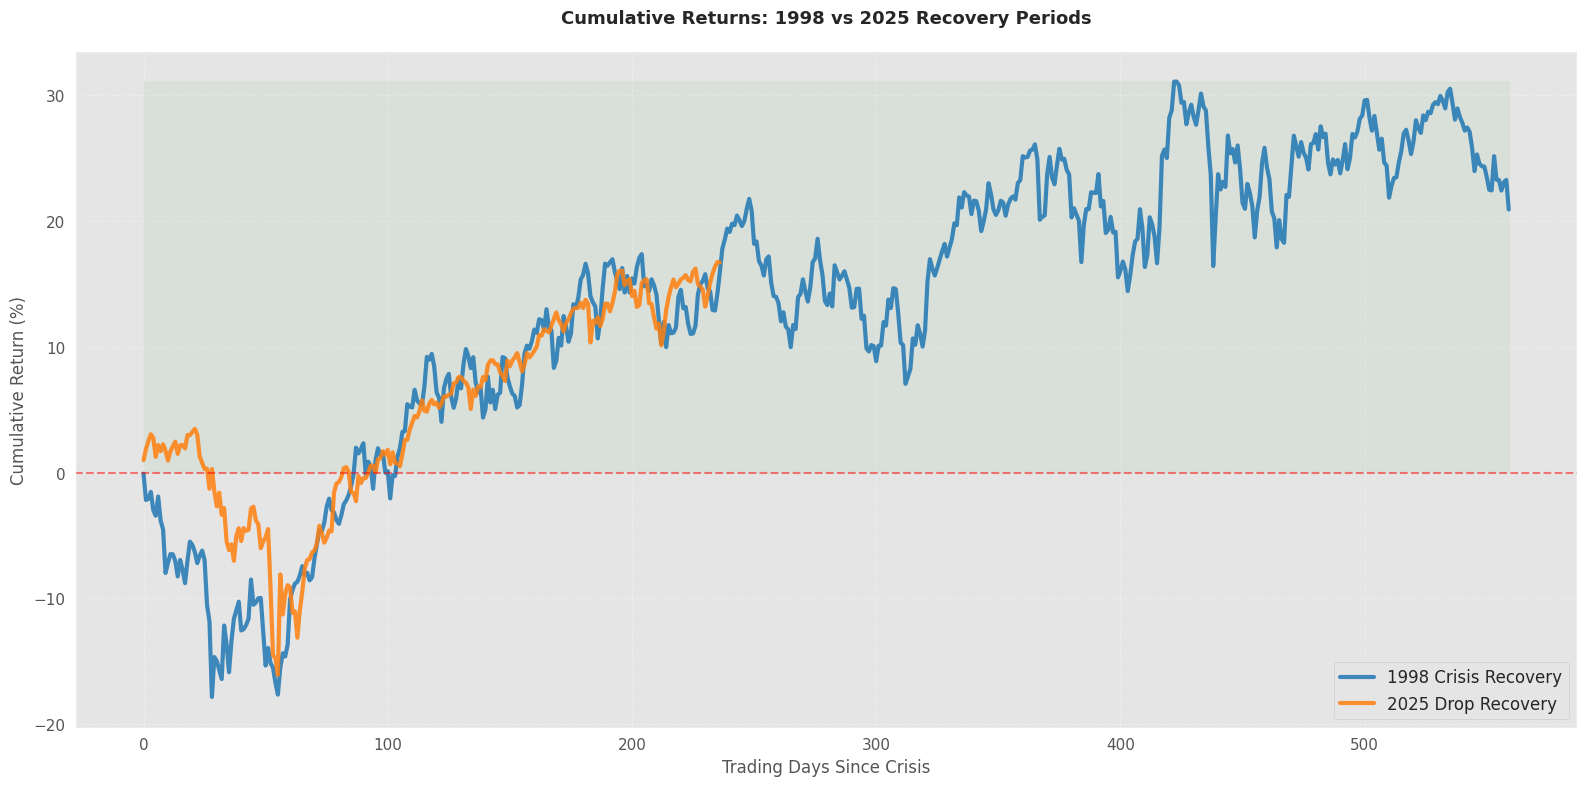

In [13]:

fig, ax = plt.subplots(figsize=(16, 8))

cumulative_1998 = (1 + returns_1998 / 100).cumprod() - 1
cumulative_1998 = cumulative_1998 * 100

ax.plot(range(len(cumulative_1998)), cumulative_1998, 
        linewidth=3, color='#1f77b4', label='1998 Crisis Recovery', alpha=0.85)

if len(returns_2025) > 0:
    cumulative_2025 = (1 + returns_2025 / 100).cumprod() - 1
    cumulative_2025 = cumulative_2025 * 100
    
    ax.plot(range(len(cumulative_2025)), cumulative_2025, 
            linewidth=3, color='#ff7f0e', label='2025 Drop Recovery', alpha=0.85)

ax.set_title('Cumulative Returns: 1998 vs 2025 Recovery Periods', 
             fontsize=13, fontweight='bold', pad=20)
ax.set_xlabel('Trading Days Since Crisis', fontsize=12)
ax.set_ylabel('Cumulative Return (%)', fontsize=12)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=12, loc='best', framealpha=0.95)

ax.fill_between(range(len(cumulative_1998)), 0, cumulative_1998.max(), 
                alpha=0.05, color='green')

plt.tight_layout()
plt.show()

## VISUALIZATION 7: Moving Average Analysis

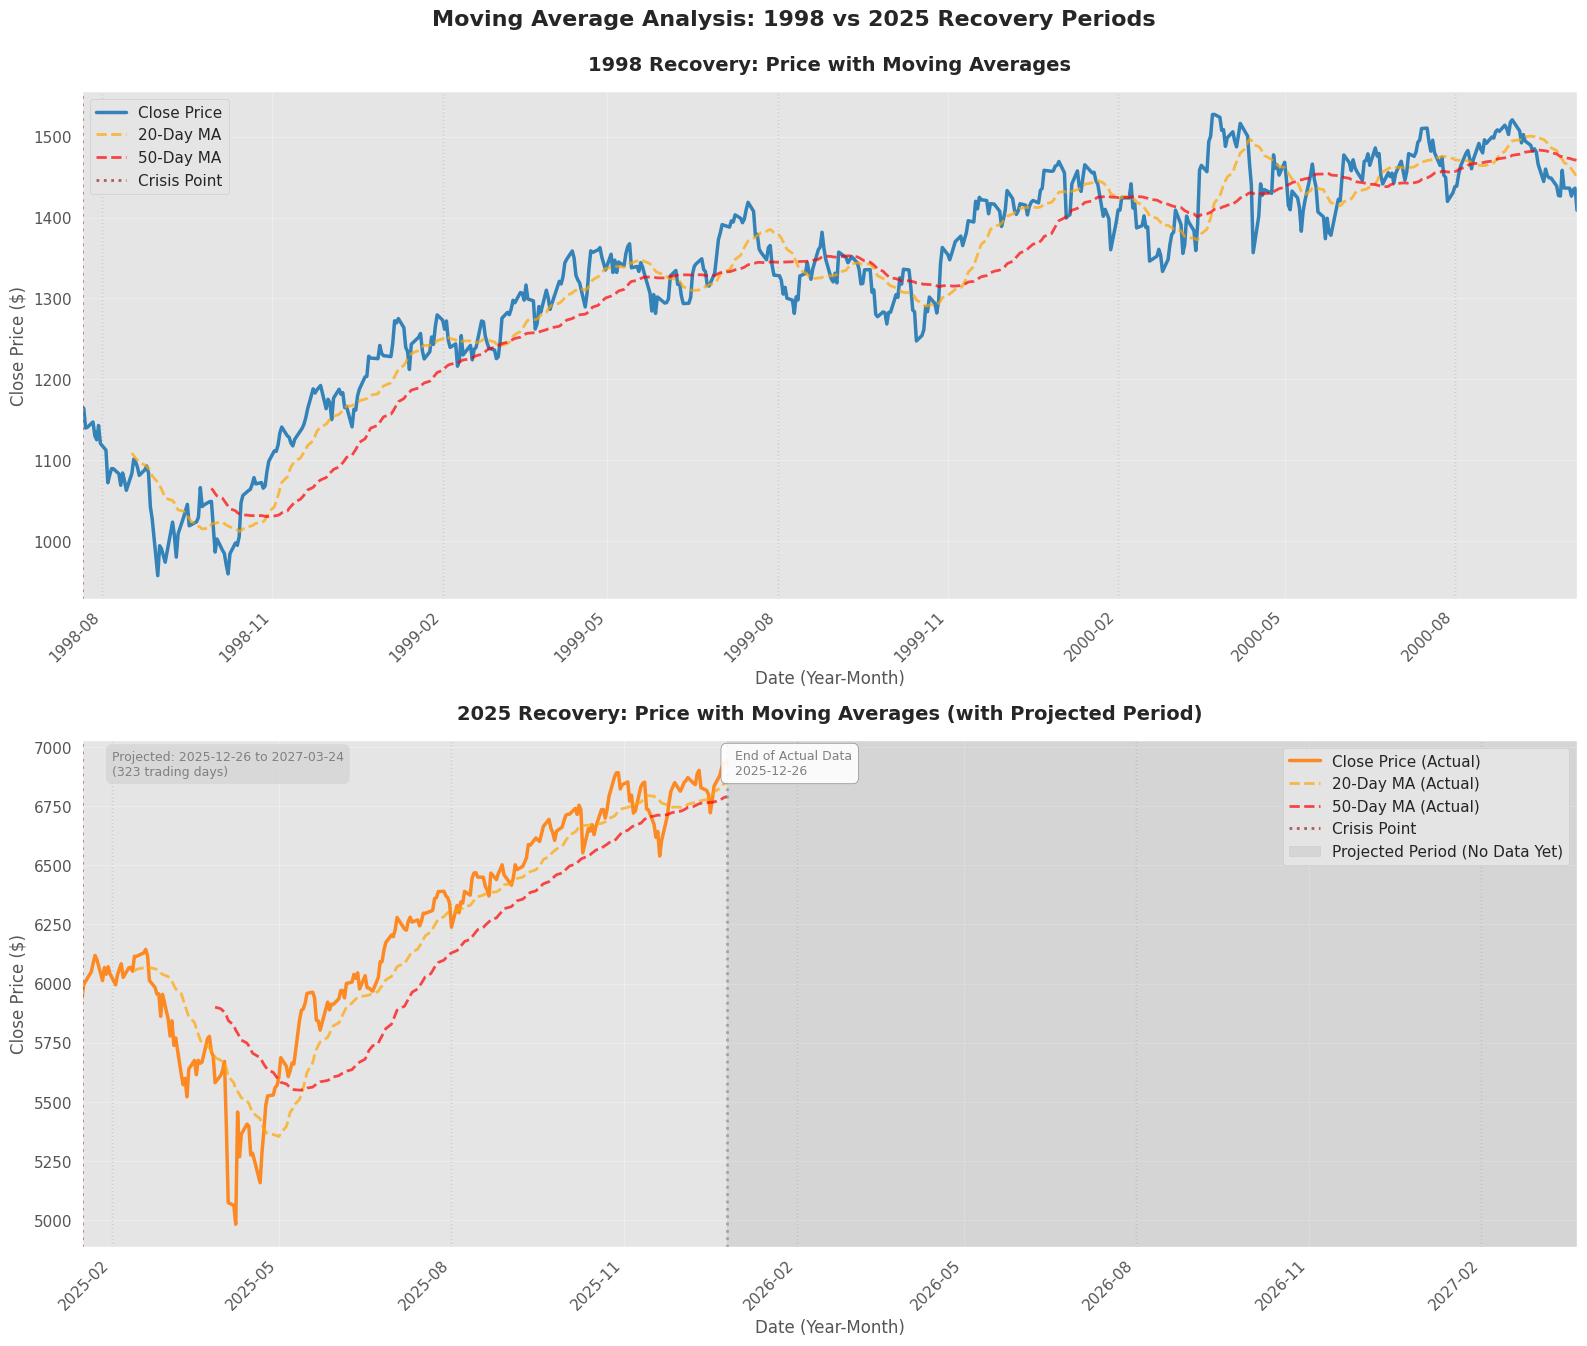

In [14]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 13.5))

# Calculate moving averages for 1998
ma_20_1998 = period_1998['Close'].rolling(window=20).mean()
ma_50_1998 = period_1998['Close'].rolling(window=50).mean()

# Plot 1998 with moving averages
ax1.plot(period_1998.index, period_1998['Close'], 
         linewidth=2.5, color='#1f77b4', label='Close Price', alpha=0.9)
ax1.plot(period_1998.index, ma_20_1998, 
         linewidth=2, color='orange', label='20-Day MA', alpha=0.7, linestyle='--')
ax1.plot(period_1998.index, ma_50_1998, 
         linewidth=2, color='red', label='50-Day MA', alpha=0.7, linestyle='--')

ax1.axvline(x=period_1998.index[0], color='darkred', linestyle=':', 
            linewidth=2, alpha=0.6, label='Crisis Point')

ax1.set_title('1998 Recovery: Price with Moving Averages', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Date (Year-Month)', fontsize=12)
ax1.set_ylabel('Close Price ($)', fontsize=12)
ax1.legend(fontsize=11, loc='best', framealpha=0.95)
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.set_xlim(period_1998.index[0], period_1998.index[-1])

# Add vertical markers every 6 months
month_6_markers = pd.date_range(start=period_1998.index[0], 
                                end=period_1998.index[-1], freq='6MS')
for date in month_6_markers:
    if date >= period_1998.index[0] and date <= period_1998.index[-1]:
        ax1.axvline(x=date, color='gray', linestyle=':', linewidth=1, alpha=0.3)

# Calculate moving averages for 2025
if current_length > 0:
    actual_mask = ~period_2025_padded['Close'].isna()
    ma_20_2025 = period_2025_padded['Close'].rolling(window=20).mean()
    ma_50_2025 = period_2025_padded['Close'].rolling(window=50).mean()
    
    # Plot actual data
    ax2.plot(period_2025_padded.index[actual_mask], 
             period_2025_padded.loc[actual_mask, 'Close'], 
             linewidth=2.5, color='#ff7f0e', label='Close Price (Actual)', alpha=0.9)
    
    # Plot moving averages for actual data
    ma_20_actual_mask = actual_mask & ~ma_20_2025.isna()
    if ma_20_actual_mask.sum() > 0:
        ax2.plot(period_2025_padded.index[ma_20_actual_mask], 
                 ma_20_2025[ma_20_actual_mask], 
                 linewidth=2, color='orange', label='20-Day MA (Actual)', 
                 alpha=0.7, linestyle='--')
    
    ma_50_actual_mask = actual_mask & ~ma_50_2025.isna()
    if ma_50_actual_mask.sum() > 0:
        ax2.plot(period_2025_padded.index[ma_50_actual_mask], 
                 ma_50_2025[ma_50_actual_mask], 
                 linewidth=2, color='red', label='50-Day MA (Actual)', 
                 alpha=0.7, linestyle='--')
    
    ax2.axvline(x=period_2025_padded.index[0], color='darkred', linestyle=':', 
                linewidth=2, alpha=0.6, label='Crisis Point')
    
    # Highlight projected period
    if current_length < target_length:
        last_actual_date = period_2025_padded.index[actual_mask][-1]
        last_projected_date = period_2025_padded.index[-1]
        
        ax2.axvspan(last_actual_date, last_projected_date, 
                    alpha=0.15, color='gray', label='Projected Period (No Data Yet)')
        
        ax2.axvline(x=last_actual_date, color='gray', linestyle=':', 
                   linewidth=2, alpha=0.6)
        
        last_actual_price = period_2025_padded.loc[actual_mask, 'Close'].iloc[-1]
        
        ax2.text(last_actual_date, last_actual_price, 
                f'  End of Actual Data\n  {last_actual_date.strftime("%Y-%m-%d")}', 
                fontsize=9, color='gray', va='center', ha='left',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                         edgecolor='gray', alpha=0.9))
    
    title_suffix = ' (with Projected Period)' if current_length < target_length else ''
    ax2.set_title(f'2025 Recovery: Price with Moving Averages{title_suffix}', 
                  fontsize=14, fontweight='bold', pad=15)
    ax2.set_xlabel('Date (Year-Month)', fontsize=12)
    ax2.set_ylabel('Close Price ($)', fontsize=12)
    ax2.legend(fontsize=11, loc='best', framealpha=0.95)
    ax2.grid(True, alpha=0.3)
    
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax2.set_xlim(period_2025_padded.index[0], period_2025_padded.index[-1])
    
    # Add vertical markers every 6 months
    month_6_markers_2025 = pd.date_range(start=period_2025_padded.index[0], 
                                         end=period_2025_padded.index[-1], freq='6MS')
    for date in month_6_markers_2025:
        if date >= period_2025_padded.index[0] and date <= period_2025_padded.index[-1]:
            ax2.axvline(x=date, color='gray', linestyle=':', linewidth=1, alpha=0.3)
    
    # Add note if insufficient data
    if current_length < 50:
        ax2.text(0.98, 0.02, 
                f'Note: Only {current_length} days of actual data\n50-day MA requires ≥50 days', 
                transform=ax2.transAxes, fontsize=9, color='red', 
                ha='right', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))
    
    # Add date range annotation for projected period
    if current_length < target_length:
        projected_days = target_length - current_length
        ax2.text(0.02, 0.98, 
                f'Projected: {last_actual_date.strftime("%Y-%m-%d")} to {last_projected_date.strftime("%Y-%m-%d")}\n({projected_days} trading days)', 
                transform=ax2.transAxes, fontsize=9, color='gray', 
                ha='left', va='top',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.7))
else:
    start_date = pd.to_datetime(CRISIS_2025)
    end_date = period_2025_padded.index[-1]
    
    ax2.text(0.5, 0.5, 
             f'No 2025 data available yet\n\nProjected Period:\n{start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")}\n({target_length} trading days)', 
             ha='center', va='center', transform=ax2.transAxes, 
             fontsize=12, color='gray',
             bbox=dict(boxstyle='round,pad=1', facecolor='lightgray', alpha=0.3))
    
    ax2.axvspan(start_date, end_date, alpha=0.15, color='lightgray')
    
    ax2.set_title('2025 Recovery: Price with Moving Averages (Projected Period)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax2.set_xlabel('Date (Year-Month)', fontsize=12)
    ax2.set_ylabel('Close Price ($)', fontsize=12)
    ax2.set_xlim(start_date, end_date)
    
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

fig.suptitle('Moving Average Analysis: 1998 vs 2025 Recovery Periods', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

In [15]:
# ============================================================================
# Moving Average Summary
# ============================================================================
print("\n" + "=" * 80)
print("MOVING AVERAGE ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n1998 Recovery Period:")
print(f"  • Date Range: {period_1998.index[0].strftime('%Y-%m-%d')} to {period_1998.index[-1].strftime('%Y-%m-%d')}")
print(f"  • Duration: {len(period_1998)} trading days ({len(period_1998)/21:.1f} months)")
print(f"  • 20-Day MA: Calculated for {ma_20_1998.notna().sum()} days (from {period_1998.index[19].strftime('%Y-%m-%d')})")
print(f"  • 50-Day MA: Calculated for {ma_50_1998.notna().sum()} days (from {period_1998.index[49].strftime('%Y-%m-%d')})")

# Calculate price vs MA statistics for 1998
if ma_20_1998.notna().sum() > 0:
    final_price_1998 = period_1998['Close'].iloc[-1]
    final_ma20_1998 = ma_20_1998.iloc[-1]
    final_ma50_1998 = ma_50_1998.iloc[-1]
    
    print(f"\n  Final Values ({period_1998.index[-1].strftime('%Y-%m-%d')}):")
    print(f"  • Close Price: ${final_price_1998:.2f}")
    print(f"  • 20-Day MA: ${final_ma20_1998:.2f} ({((final_price_1998/final_ma20_1998 - 1) * 100):+.2f}%)")
    if not pd.isna(final_ma50_1998):
        print(f"  • 50-Day MA: ${final_ma50_1998:.2f} ({((final_price_1998/final_ma50_1998 - 1) * 100):+.2f}%)")
        if final_ma20_1998 > final_ma50_1998:
            print(f"  • Trend: Bullish (20-MA above 50-MA)")
        else:
            print(f"  • Trend: Bearish (20-MA below 50-MA)")

if current_length > 0:
    actual_mask = ~period_2025_padded['Close'].isna()
    last_actual_date = period_2025_padded.index[actual_mask][-1]
    
    print(f"\n2025 Recovery Period:")
    print(f"  • Date Range: {period_2025_padded.index[0].strftime('%Y-%m-%d')} to {period_2025_padded.index[-1].strftime('%Y-%m-%d')}")
    print(f"  • Actual Data: {period_2025_padded.index[0].strftime('%Y-%m-%d')} to {last_actual_date.strftime('%Y-%m-%d')}")
    print(f"  • Duration: {current_length} trading days ({current_length/21:.1f} months)")
    
    if current_length >= 20:
        print(f"  • 20-Day MA: Calculated for {ma_20_2025.notna().sum()} days (from {period_2025_padded.index[19].strftime('%Y-%m-%d')})")
    else:
        print(f"  • 20-Day MA: Not yet available (need {20 - current_length} more days)")
    
    if current_length >= 50:
        print(f"  • 50-Day MA: Calculated for {ma_50_2025.notna().sum()} days (from {period_2025_padded.index[49].strftime('%Y-%m-%d')})")
    else:
        print(f"  • 50-Day MA: Not yet available (need {50 - current_length} more days)")
    
    if current_length < target_length:
        projected_days = target_length - current_length
        print(f"\n  • Projected Period: {last_actual_date.strftime('%Y-%m-%d')} to {period_2025_padded.index[-1].strftime('%Y-%m-%d')}")
        print(f"  • Projected Days: {projected_days} trading days ({projected_days/21:.1f} months)")
    
    # Calculate current position if enough data
    if current_length >= 20:
        last_price = period_2025_padded.loc[actual_mask, 'Close'].iloc[-1]
        last_ma20 = ma_20_2025[ma_20_actual_mask].iloc[-1] if ma_20_actual_mask.sum() > 0 else None
        last_ma50 = ma_50_2025[ma_50_actual_mask].iloc[-1] if ma_50_actual_mask.sum() > 0 else None
        
        print(f"\n  Current Position ({last_actual_date.strftime('%Y-%m-%d')}):")
        print(f"  • Close Price: ${last_price:.2f}")
        if last_ma20 is not None:
            print(f"  • 20-Day MA: ${last_ma20:.2f} ({((last_price/last_ma20 - 1) * 100):+.2f}%)")
        if last_ma50 is not None:
            print(f"  • 50-Day MA: ${last_ma50:.2f} ({((last_price/last_ma50 - 1) * 100):+.2f}%)")
            
            if last_ma20 is not None and last_ma20 > last_ma50:
                print(f"  • Trend: Bullish (20-MA above 50-MA)")
            elif last_ma20 is not None:
                print(f"  • Trend: Bearish (20-MA below 50-MA)")
else:
    print(f"\n2025 Recovery Period:")
    print(f"  • No actual data available yet")
    print(f"  • Projected Range: {period_2025_padded.index[0].strftime('%Y-%m-%d')} to {period_2025_padded.index[-1].strftime('%Y-%m-%d')}")
    print(f"  • Projected Duration: {target_length} trading days ({target_length/21:.1f} months)")

print("=" * 80)


MOVING AVERAGE ANALYSIS SUMMARY

1998 Recovery Period:
  • Date Range: 1998-07-21 to 2000-10-06
  • Duration: 561 trading days (26.7 months)
  • 20-Day MA: Calculated for 542 days (from 1998-08-17)
  • 50-Day MA: Calculated for 512 days (from 1998-09-29)

  Final Values (2000-10-06):
  • Close Price: $1408.99
  • 20-Day MA: $1449.31 (-2.78%)
  • 50-Day MA: $1470.39 (-4.18%)
  • Trend: Bearish (20-MA below 50-MA)

2025 Recovery Period:
  • Date Range: 2025-01-16 to 2027-03-24
  • Actual Data: 2025-01-16 to 2025-12-26
  • Duration: 238 trading days (11.3 months)
  • 20-Day MA: Calculated for 219 days (from 2025-02-13)
  • 50-Day MA: Calculated for 189 days (from 2025-03-28)

  • Projected Period: 2025-12-26 to 2027-03-24
  • Projected Days: 323 trading days (15.4 months)

  Current Position (2025-12-26):
  • Close Price: $6929.94
  • 20-Day MA: $6848.41 (+1.19%)
  • 50-Day MA: $6790.16 (+2.06%)
  • Trend: Bullish (20-MA above 50-MA)


## VISUALIZATION 8: Volatility Analysis Over Time

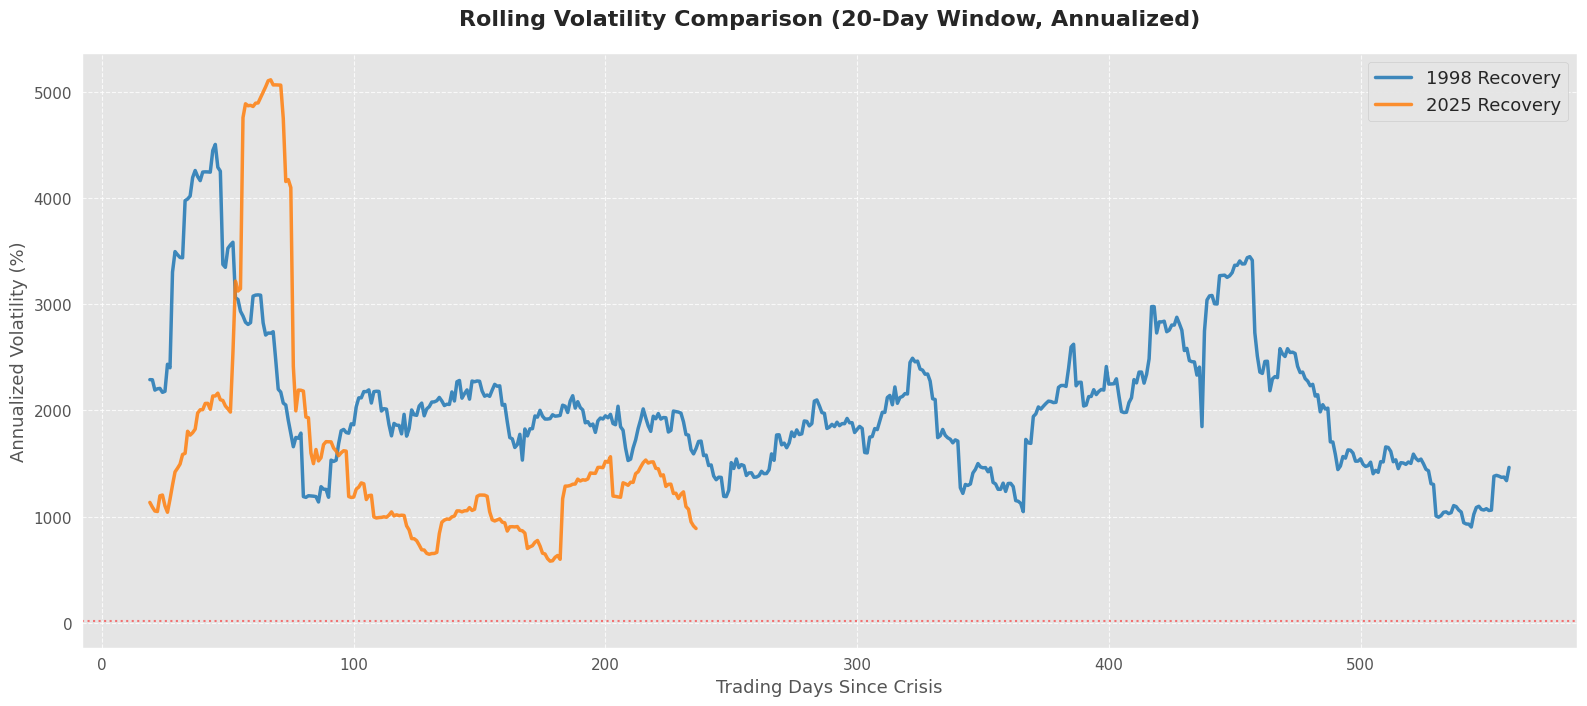

In [16]:

fig, ax = plt.subplots(figsize=(16, 7.2))

window_size = 20
rolling_vol_1998 = returns_1998.rolling(window=window_size).std() * np.sqrt(252) * 100

ax.plot(range(len(rolling_vol_1998)), rolling_vol_1998, 
        linewidth=2.5, color='#1f77b4', label='1998 Recovery', alpha=0.85)

if len(returns_2025) > window_size:
    rolling_vol_2025 = returns_2025.rolling(window=window_size).std() * np.sqrt(252) * 100
    
    ax.plot(range(len(rolling_vol_2025)), rolling_vol_2025, 
            linewidth=2.5, color='#ff7f0e', label='2025 Recovery', alpha=0.85)

ax.set_title(f'Rolling Volatility Comparison ({window_size}-Day Window, Annualized)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Trading Days Since Crisis', fontsize=13)
ax.set_ylabel('Annualized Volatility (%)', fontsize=13)
ax.legend(fontsize=13, loc='best', framealpha=0.95)
ax.grid(True, alpha=0.8, linestyle='--')

ax.axhline(y=20, color='red', linestyle=':', linewidth=1.5, alpha=0.5, label='20% Reference')

plt.tight_layout()
plt.show()

## VISUALIZATION 9: Risk-Reward Analysis

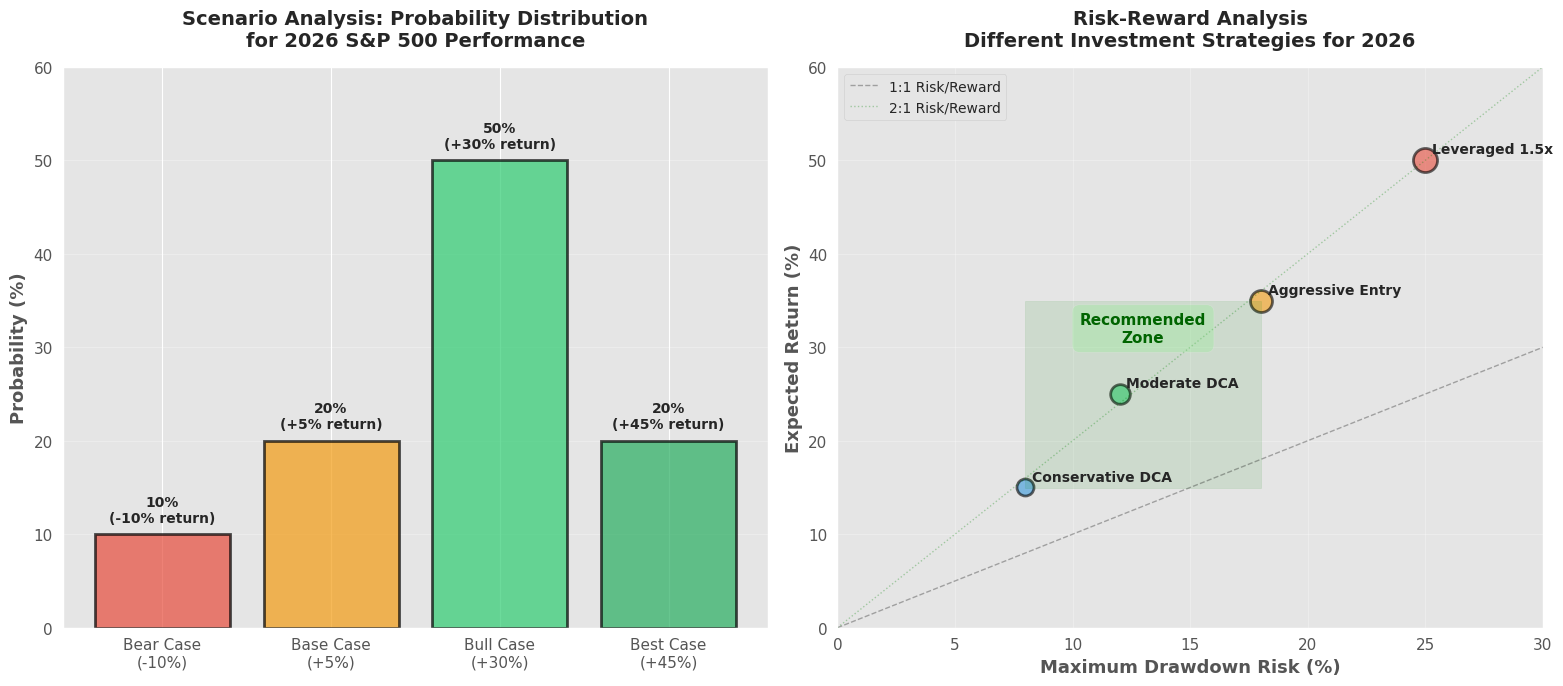

In [17]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left chart: Probability distribution of outcomes
scenarios = ['Bear Case\n(-10%)', 'Base Case\n(+5%)', 'Bull Case\n(+30%)', 'Best Case\n(+45%)']
probabilities = [10, 20, 50, 20]
returns_scenarios = [-10, 5, 30, 45]
colors_scenarios = ['#e74c3c', '#f39c12', '#2ecc71', '#27ae60']

bars1 = ax1.bar(scenarios, probabilities, color=colors_scenarios, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Probability (%)', fontsize=13, fontweight='bold')
ax1.set_title('Scenario Analysis: Probability Distribution\nfor 2026 S&P 500 Performance', 
              fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(0, 60)

for bar, prob, ret in zip(bars1, probabilities, returns_scenarios):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{prob}%\n({ret:+d}% return)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Right chart: Risk-Reward scatter
investment_strategies = [
    ('Conservative DCA', 8, 15, 150),
    ('Moderate DCA', 12, 25, 200),
    ('Aggressive Entry', 18, 35, 250),
    ('Leveraged 1.5x', 25, 50, 300)
]

for strategy, risk, reward, size in investment_strategies:
    if 'Conservative' in strategy:
        color = '#3498db'
    elif 'Moderate' in strategy:
        color = '#2ecc71'
    elif 'Aggressive' in strategy:
        color = '#f39c12'
    else:
        color = '#e74c3c'
    
    ax2.scatter(risk, reward, s=size, alpha=0.6, color=color, edgecolors='black', linewidth=2)
    ax2.annotate(strategy, (risk, reward), xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

ax2.plot([0, 30], [0, 30], 'k--', alpha=0.3, linewidth=1, label='1:1 Risk/Reward')
ax2.plot([0, 30], [0, 60], 'g:', alpha=0.3, linewidth=1, label='2:1 Risk/Reward')

ax2.set_xlabel('Maximum Drawdown Risk (%)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Expected Return (%)', fontsize=13, fontweight='bold')
ax2.set_title('Risk-Reward Analysis\nDifferent Investment Strategies for 2026', 
              fontsize=14, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10, loc='upper left')
ax2.set_xlim(0, 30)
ax2.set_ylim(0, 60)

optimal_zone = plt.Rectangle((8, 15), 10, 20, alpha=0.1, color='green', label='Optimal Zone')
ax2.add_patch(optimal_zone)
ax2.text(13, 32, 'Recommended\nZone', ha='center', va='center', 
         fontsize=11, fontweight='bold', color='darkgreen',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.3))

plt.tight_layout()
plt.show()

## VISUALIZATION 10: 2026 Price Projection Chart

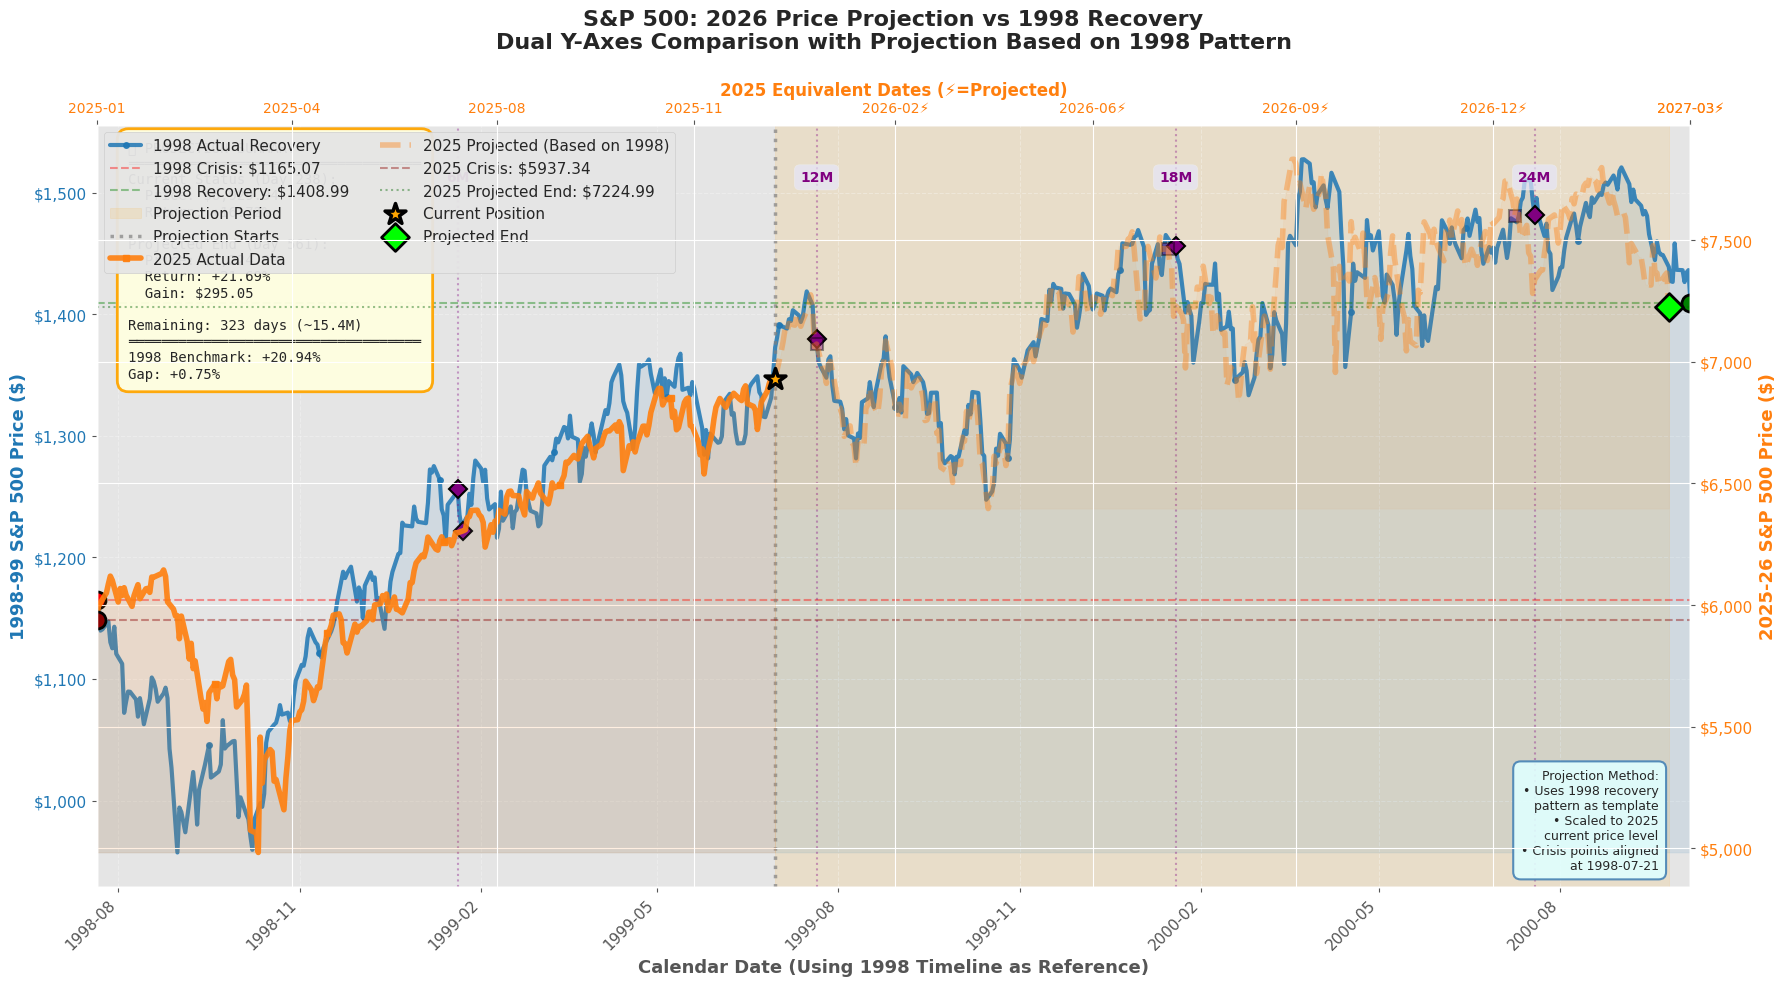

In [18]:
# Calculate projection for 2025 (if needed)
if current_length < target_length:
    days_to_project = target_length - current_length
    
    # Use 1998 pattern for projection
    projection_start_idx = current_length
    projection_end_idx = min(current_length + days_to_project, len(period_1998))
    
    # Calculate growth rate from 1998 pattern
    reference_1998_prices = period_1998['Close'].iloc[projection_start_idx:projection_end_idx]
    
    if len(reference_1998_prices) > 0:
        # Scale 1998 pattern to 2025 current price
        last_actual_price = period_2025_padded.loc[~period_2025_padded['Close'].isna(), 'Close'].iloc[-1]
        reference_start = period_1998['Close'].iloc[projection_start_idx - 1] if projection_start_idx > 0 else period_1998['Close'].iloc[0]
        
        # Calculate scaling factor
        scale_factor = last_actual_price / reference_start
        projected_prices = reference_1998_prices * scale_factor
        
        # Update padded data with projection
        projection_mask = period_2025_padded['Close'].isna()
        period_2025_padded.loc[projection_mask, 'Close'] = projected_prices.values[:sum(projection_mask)]

fig, ax1 = plt.subplots(figsize=(18, 10))

# Calculate statistics
crisis_price_1998 = period_1998['Close'].iloc[0]
recovery_price_1998 = period_1998['Close'].iloc[-1]
return_1998 = ((recovery_price_1998 / crisis_price_1998) - 1) * 100

# Plot 1998 complete recovery on left Y-axis
ax1.plot(period_1998.index, period_1998['Close'], 
         linewidth=3, color='#1f77b4', label='1998 Actual Recovery', 
         alpha=0.85, marker='o', markersize=4, markevery=40)
ax1.fill_between(period_1998.index, period_1998['Close'], 
                 period_1998['Close'].min(), alpha=0.1, color='#1f77b4')

# Add 1998 reference lines
ax1.axhline(y=crisis_price_1998, color='red', linestyle='--', 
           linewidth=1.5, alpha=0.4, label=f'1998 Crisis: ${crisis_price_1998:.2f}')
ax1.axhline(y=recovery_price_1998, color='green', linestyle='--', 
           linewidth=1.5, alpha=0.4, label=f'1998 Recovery: ${recovery_price_1998:.2f}')

# Mark start and end points for 1998
ax1.scatter([period_1998.index[0]], [crisis_price_1998], 
           color='red', s=150, zorder=5, edgecolors='black', linewidth=2)
ax1.scatter([period_1998.index[-1]], [recovery_price_1998], 
           color='green', s=150, zorder=5, edgecolors='black', linewidth=2)

# Configure left Y-axis (1998)
ax1.set_ylabel('1998-99 S&P 500 Price ($)', fontsize=13, fontweight='bold', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Plot 2025 with projection on right Y-axis
if current_length > 0:
    actual_mask = ~period_2025_padded['Close'].isna().iloc[:current_length]
    projected_mask = period_2025_padded['Close'].notna() & pd.Series(
        [i >= current_length for i in range(len(period_2025_padded))], 
        index=period_2025_padded.index
    )
    
    # Create aligned dates: shift 2025 data to match 1998 date range
    date_offset = period_1998.index[0] - period_2025_padded.index[0]
    aligned_2025_dates = period_2025_padded.index + date_offset
    
    crisis_price_2025 = period_2025_padded['Close'].iloc[0]
    current_price_2025 = period_2025_padded.loc[period_2025_padded.index[current_length - 1], 'Close']
    projected_end_price = period_2025_padded['Close'].iloc[-1]
    
    return_2025_actual = ((current_price_2025 / crisis_price_2025) - 1) * 100
    return_2025_projected = ((projected_end_price / crisis_price_2025) - 1) * 100
    
    # Create second Y-axis for 2025
    ax2 = ax1.twinx()
    
    # Plot actual 2025 data
    ax2.plot(aligned_2025_dates[:current_length], 
            period_2025_padded['Close'].iloc[:current_length], 
            linewidth=4, color='#ff7f0e', label='2025 Actual Data', 
            alpha=0.9, marker='s', markersize=5, markevery=40, zorder=10)
    
    # Plot projected continuation
    if current_length < len(period_2025_padded):
        # Overlap one point for continuity
        projection_indices = list(range(current_length - 1, len(period_2025_padded)))
        ax2.plot(aligned_2025_dates[projection_indices], 
                period_2025_padded['Close'].iloc[projection_indices], 
                linewidth=4, color='#ff7f0e', alpha=0.4, 
                linestyle='--', label='2025 Projected (Based on 1998)', zorder=8)
        
        # Fill between actual and projected
        ax2.fill_between(aligned_2025_dates[:current_length], 
                        period_2025_padded['Close'].iloc[:current_length], 
                        period_2025_padded['Close'].iloc[:current_length].min(), 
                        alpha=0.12, color='#ff7f0e')
        ax2.fill_between(aligned_2025_dates[projection_indices], 
                        period_2025_padded['Close'].iloc[projection_indices], 
                        period_2025_padded['Close'].iloc[projection_indices].min(), 
                        alpha=0.06, color='#ff7f0e')
        
        # Highlight projected period with shading
        projected_start = aligned_2025_dates[current_length - 1]
        projected_end = aligned_2025_dates[-1]
        ax1.axvspan(projected_start, projected_end, 
                   alpha=0.12, color='orange', label='Projection Period', zorder=0)
        
        # Add vertical line at projection start
        ax1.axvline(x=projected_start, color='gray', linestyle=':', 
                   linewidth=2.5, alpha=0.7, label='Projection Starts')
    
    # Add 2025 reference lines
    ax2.axhline(y=crisis_price_2025, color='darkred', linestyle='--', 
               linewidth=1.5, alpha=0.4, label=f'2025 Crisis: ${crisis_price_2025:.2f}')
    ax2.axhline(y=projected_end_price, color='darkgreen', linestyle=':', 
               linewidth=1.5, alpha=0.4, label=f'2025 Projected End: ${projected_end_price:.2f}')
    
    # Mark key points for 2025
    ax2.scatter([aligned_2025_dates[0]], [crisis_price_2025], 
               color='darkred', s=150, zorder=11, edgecolors='black', linewidth=2)
    ax2.scatter([aligned_2025_dates[current_length - 1]], [current_price_2025], 
               color='orange', s=250, zorder=11, edgecolors='black', linewidth=2.5, 
               marker='*', label='Current Position')
    ax2.scatter([aligned_2025_dates[-1]], [projected_end_price], 
               color='lime', s=200, zorder=11, edgecolors='black', linewidth=2, 
               marker='D', label='Projected End')
    
    # Configure right Y-axis (2025)
    ax2.set_ylabel('2025-26 S&P 500 Price ($)', fontsize=13, fontweight='bold', color='#ff7f0e')
    ax2.tick_params(axis='y', labelcolor='#ff7f0e')
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, 
              fontsize=11, loc='upper left', framealpha=0.95, ncol=2)

# Configure X-axis
ax1.set_xlabel('Calendar Date (Using 1998 Timeline as Reference)', fontsize=13, fontweight='bold')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.set_xlim(period_1998.index[0], period_1998.index[-1])

# Add milestone markers
for month in [6, 12, 18, 24]:
    idx = min(month * TRADING_DAYS_PER_MONTH, len(period_1998) - 1)
    if idx < len(period_1998):
        date = period_1998.index[idx]
        ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.5, alpha=0.35)
        
        # Add month label
        y_pos = ax1.get_ylim()[1] * 0.97
        ax1.text(date, y_pos, f'{month}M', 
                ha='center', fontsize=10, color='purple', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='lavender', alpha=0.7))
        
        # Mark milestone on both lines
        price_1998 = period_1998['Close'].iloc[idx]
        ax1.plot(date, price_1998, 'D', color='purple', markersize=9, 
                markeredgecolor='black', markeredgewidth=1.5, zorder=6)
        
        if current_length > 0 and idx < len(aligned_2025_dates):
            price_2025 = period_2025_padded.iloc[idx]['Close']
            marker_style = 'D' if idx < current_length else 's'
            alpha_val = 0.9 if idx < current_length else 0.4
            ax2.plot(aligned_2025_dates[idx], price_2025, marker_style, 
                    color='purple', markersize=9, alpha=alpha_val,
                    markeredgecolor='black', markeredgewidth=1.5, zorder=6)

# Add secondary X-axis showing 2025 dates
if current_length > 0:
    ax3 = ax1.twiny()
    ax3.set_xlim(ax1.get_xlim())
    
    # Create tick positions
    tick_positions_1998 = []
    tick_labels_2025 = []
    
    for i in range(0, len(period_1998), len(period_1998)//8):
        if i < len(aligned_2025_dates):
            tick_positions_1998.append(mdates.date2num(period_1998.index[i]))
            
            if i < len(period_2025_padded):
                date_2025 = period_2025_padded.index[i]
                label_2025 = date_2025.strftime('%Y-%m')
                if i >= current_length:
                    label_2025 += '⚡'  # Mark projected dates
                tick_labels_2025.append(label_2025)
            else:
                tick_labels_2025.append('')
    
    # Add the last date
    if len(period_1998) > 0 and len(period_2025_padded) > 0:
        tick_positions_1998.append(mdates.date2num(period_1998.index[-1]))
        last_label = period_2025_padded.index[-1].strftime('%Y-%m')
        if len(period_2025_padded) - 1 >= current_length:
            last_label += '⚡'
        tick_labels_2025.append(last_label)
    
    ax3.set_xticks(tick_positions_1998)
    ax3.set_xticklabels(tick_labels_2025, fontsize=10)
    ax3.set_xlabel('2025 Equivalent Dates (⚡=Projected)', fontsize=12, 
                   color='#ff7f0e', fontweight='bold')
    ax3.tick_params(axis='x', labelcolor='#ff7f0e')

# Grid
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

# Title
title = 'S&P 500: 2026 Price Projection vs 1998 Recovery\n'
title += 'Dual Y-Axes Comparison with Projection Based on 1998 Pattern'
ax1.set_title(title, fontsize=16, fontweight='bold', pad=55)

# Add comprehensive projection summary box
if current_length > 0 and current_length < target_length:
    days_remaining = target_length - current_length
    months_remaining = days_remaining / TRADING_DAYS_PER_MONTH
    
    textstr = f'📊 PROJECTION SUMMARY\n'
    textstr += f'{"═" * 35}\n'
    textstr += f'Current Status (Day {current_length}):\n'
    textstr += f'  Price: ${current_price_2025:,.2f}\n'
    textstr += f'  Return: {return_2025_actual:+.2f}%\n\n'
    textstr += f'Projected End (Day {target_length}):\n'
    textstr += f'  Price: ${projected_end_price:,.2f}\n'
    textstr += f'  Return: {return_2025_projected:+.2f}%\n'
    textstr += f'  Gain: ${projected_end_price - current_price_2025:,.2f}\n\n'
    textstr += f'Remaining: {days_remaining} days (~{months_remaining:.1f}M)\n'
    textstr += f'{"═" * 35}\n'
    textstr += f'1998 Benchmark: {return_1998:+.2f}%\n'
    textstr += f'Gap: {return_2025_projected - return_1998:+.2f}%'
    
    props = dict(boxstyle='round,pad=0.8', facecolor='lightyellow', 
                edgecolor='orange', linewidth=2, alpha=0.95)
    ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=10,
            verticalalignment='top', bbox=props, family='monospace')

# Add methodology note
method_text = 'Projection Method:\n'
method_text += f'• Uses 1998 recovery\n'
method_text += f'  pattern as template\n'
method_text += f'• Scaled to 2025\n'
method_text += f'  current price level\n'
method_text += f'• Crisis points aligned\n'
method_text += f'  at {period_1998.index[0].strftime("%Y-%m-%d")}'

props2 = dict(boxstyle='round,pad=0.6', facecolor='lightcyan', 
             edgecolor='steelblue', linewidth=1.5, alpha=0.9)
ax1.text(0.98, 0.02, method_text, transform=ax1.transAxes, fontsize=9,
        verticalalignment='bottom', horizontalalignment='right', bbox=props2)

plt.tight_layout()
plt.show()



In [19]:
# Print detailed projection analysis
print("\n" + "=" * 95)
print("VISUALIZATION 11: 2026 PRICE PROJECTION WITH DUAL-AXIS COMPARISON")
print("=" * 95)

print(f"\n DATE ALIGNMENT:")
print(f"  Both series start at: {period_1998.index[0].strftime('%Y-%m-%d')}")
print(f"  Date offset applied: {date_offset.days} days")

print(f"\n 1998-99 CRISIS (COMPLETE RECOVERY):")
print(f"  Timeline: {period_1998.index[0].strftime('%Y-%m-%d')} to {period_1998.index[-1].strftime('%Y-%m-%d')}")
print(f"  Crisis Price: ${crisis_price_1998:.2f}")
print(f"  Recovery Price: ${recovery_price_1998:.2f}")
print(f"  Total Return: {return_1998:+.2f}%")
print(f"  Duration: {len(period_1998)} trading days")

if current_length > 0:
    print(f"\n 2025-26 RECOVERY (ACTUAL + PROJECTED):")
    print(f"  Original Timeline: {period_2025_padded.index[0].strftime('%Y-%m-%d')} to {period_2025_padded.index[-1].strftime('%Y-%m-%d')}")
    print(f"  Aligned Timeline: {aligned_2025_dates[0].strftime('%Y-%m-%d')} to {aligned_2025_dates[-1].strftime('%Y-%m-%d')}")
    print(f"\n  ACTUAL DATA (Days 1-{current_length}):")
    print(f"    Crisis Price: ${crisis_price_2025:.2f}")
    print(f"    Current Price: ${current_price_2025:.2f}")
    print(f"    Return to Date: {return_2025_actual:+.2f}%")
    
    if current_length < target_length:
        print(f"\n  PROJECTED DATA (Days {current_length+1}-{target_length}):")
        print(f"    Projected End Price: ${projected_end_price:.2f}")
        print(f"    Projected Total Return: {return_2025_projected:+.2f}%")
        print(f"    Expected Gain: ${projected_end_price - current_price_2025:,.2f}")
        print(f"    Days Remaining: {target_length - current_length}")
        print(f"    Months Remaining: ~{(target_length - current_length) / TRADING_DAYS_PER_MONTH:.1f}")
    
    print(f"\n PROJECTION METHODOLOGY:")
    print(f"  • Template: 1998 recovery pattern (days {current_length}-{target_length})")
    print(f"  • Scaling: Adjusted to match 2025 current price level")
    print(f"  • Base Price: ${current_price_2025:.2f} (last actual)")
    print(f"  • Assumption: 2025 follows similar trajectory as 1998")
    
    print(f"\n COMPARATIVE PERFORMANCE:")
    print(f"  At Day {current_length}:")
    equivalent_1998_idx = min(current_length - 1, len(period_1998) - 1)
    equivalent_1998_price = period_1998['Close'].iloc[equivalent_1998_idx]
    equivalent_1998_return = ((equivalent_1998_price / crisis_price_1998) - 1) * 100
    
    print(f"    1998 Price: ${equivalent_1998_price:.2f} ({equivalent_1998_return:+.2f}%)")
    print(f"    2025 Price: ${current_price_2025:.2f} ({return_2025_actual:+.2f}%)")
    print(f"    Gap: {return_2025_actual - equivalent_1998_return:+.2f}%", end="")
    
    if return_2025_actual > equivalent_1998_return:
        print(" ✓ (2025 AHEAD)")
    else:
        print(" ⚠ (2025 BEHIND)")
    
    print(f"\n  Projected at Day {target_length}:")
    print(f"    1998 Final: ${recovery_price_1998:.2f} ({return_1998:+.2f}%)")
    print(f"    2025 Projected: ${projected_end_price:.2f} ({return_2025_projected:+.2f}%)")
    print(f"    Projected Gap: {return_2025_projected - return_1998:+.2f}%", end="")
    
    if return_2025_projected > return_1998:
        print(" ✓ (PROJECTED TO EXCEED 1998)")
    else:
        print(" ⚠ (PROJECTED TO TRAIL 1998)")
    
    # Milestone projection comparison
    print(f"\n MILESTONE PROJECTIONS:")
    for month in [6, 12, 18, 24]:
        idx = min(month * TRADING_DAYS_PER_MONTH, len(period_1998) - 1)
        if idx < len(period_1998):
            price_1998_milestone = period_1998['Close'].iloc[idx]
            return_1998_milestone = ((price_1998_milestone / crisis_price_1998) - 1) * 100
            
            print(f"  {month}-Month:")
            print(f"    1998: ${price_1998_milestone:.2f} ({return_1998_milestone:+.2f}%)")
            
            if idx < len(period_2025_padded):
                price_2025_milestone = period_2025_padded.iloc[idx]['Close']
                return_2025_milestone = ((price_2025_milestone / crisis_price_2025) - 1) * 100
                status = "ACTUAL" if idx < current_length else "PROJECTED"
                print(f"    2025: ${price_2025_milestone:.2f} ({return_2025_milestone:+.2f}%) [{status}]")
                gap = return_2025_milestone - return_1998_milestone
                print(f"    Gap: {gap:+.2f}%")

print("\n" + "=" * 95 + "\n")



VISUALIZATION 11: 2026 PRICE PROJECTION WITH DUAL-AXIS COMPARISON

 DATE ALIGNMENT:
  Both series start at: 1998-07-21
  Date offset applied: -9676 days

 1998-99 CRISIS (COMPLETE RECOVERY):
  Timeline: 1998-07-21 to 2000-10-06
  Crisis Price: $1165.07
  Recovery Price: $1408.99
  Total Return: +20.94%
  Duration: 561 trading days

 2025-26 RECOVERY (ACTUAL + PROJECTED):
  Original Timeline: 2025-01-16 to 2027-03-24
  Aligned Timeline: 1998-07-21 to 2000-09-25

  ACTUAL DATA (Days 1-238):
    Crisis Price: $5937.34
    Current Price: $6929.94
    Return to Date: +16.72%

  PROJECTED DATA (Days 239-561):
    Projected End Price: $7224.99
    Projected Total Return: +21.69%
    Expected Gain: $295.05
    Days Remaining: 323
    Months Remaining: ~15.4

 PROJECTION METHODOLOGY:
  • Template: 1998 recovery pattern (days 238-561)
  • Scaling: Adjusted to match 2025 current price level
  • Base Price: $6929.94 (last actual)
  • Assumption: 2025 follows similar trajectory as 1998

 COMPARATI

##  ANALYSIS SUMMARY

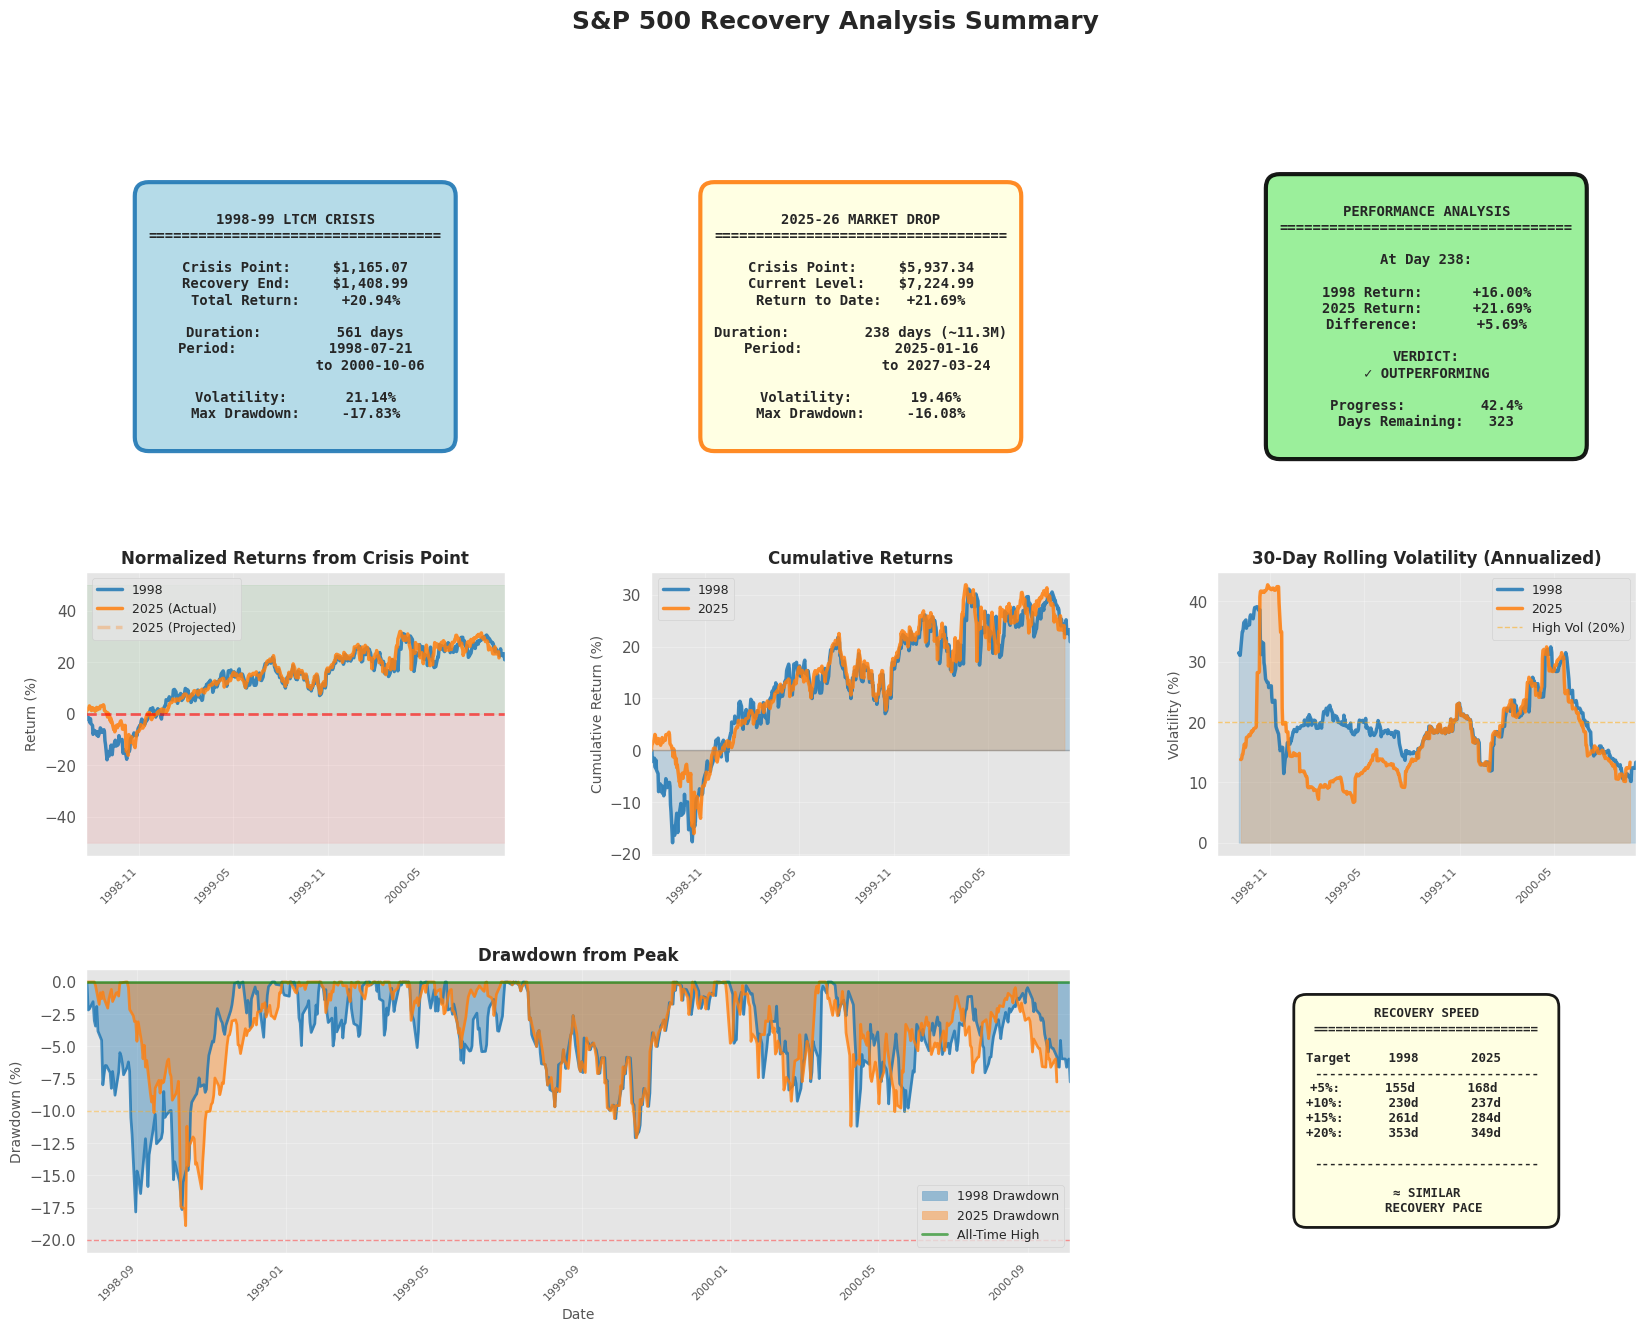

In [20]:
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.35)

# Calculate key metrics
crisis_price_1998 = period_1998['Close'].iloc[0]
recovery_price_1998 = period_1998['Close'].iloc[-1]
return_1998 = ((recovery_price_1998 / crisis_price_1998) - 1) * 100

if current_length > 0:
    actual_mask = ~period_2025_padded['Close'].isna()
    crisis_price_2025 = period_2025_padded.loc[actual_mask, 'Close'].iloc[0]
    current_price_2025 = period_2025_padded.loc[actual_mask, 'Close'].iloc[-1]
    return_2025 = ((current_price_2025 / crisis_price_2025) - 1) * 100
    
    # Calculate aligned dates
    date_offset = period_1998.index[0] - period_2025_padded.index[0]
    aligned_2025_dates = period_2025_padded.index + date_offset


# MIDDLE ROW: KEY METRICS

# 1998 Metrics Box
ax_metrics1 = fig.add_subplot(gs[0, 0])
ax_metrics1.axis('off')

metrics_1998 = f"""
1998-99 LTCM CRISIS
{'='*35}

Crisis Point:     ${crisis_price_1998:,.2f}
Recovery End:     ${recovery_price_1998:,.2f}
Total Return:     {return_1998:+.2f}%

Duration:         {len(period_1998)} days
Period:           {period_1998.index[0].strftime('%Y-%m-%d')}
                  to {period_1998.index[-1].strftime('%Y-%m-%d')}

Volatility:       {period_1998['Close'].pct_change().std() * np.sqrt(252) * 100:.2f}%
Max Drawdown:     {((period_1998['Close'].min() / crisis_price_1998) - 1) * 100:.2f}%
"""

ax_metrics1.text(0.5, 0.5, metrics_1998, transform=ax_metrics1.transAxes,
                fontsize=10, verticalalignment='center', horizontalalignment='center',
                fontfamily='monospace', fontweight='bold',
                bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', 
                         edgecolor='#1f77b4', linewidth=3, alpha=0.9))

# 2025 Metrics Box
ax_metrics2 = fig.add_subplot(gs[0, 1])
ax_metrics2.axis('off')

if current_length > 0:
    actual_data_2025 = period_2025_padded.loc[actual_mask, 'Close']
    metrics_2025 = f"""
2025-26 MARKET DROP
{'='*35}

Crisis Point:     ${crisis_price_2025:,.2f}
Current Level:    ${current_price_2025:,.2f}
Return to Date:   {return_2025:+.2f}%

Duration:         {current_length} days (~{current_length/21:.1f}M)
Period:           {period_2025_padded.index[0].strftime('%Y-%m-%d')}
                  to {period_2025_padded.index[actual_mask][-1].strftime('%Y-%m-%d')}

Volatility:       {actual_data_2025.pct_change().std() * np.sqrt(252) * 100:.2f}%
Max Drawdown:     {((actual_data_2025.min() / crisis_price_2025) - 1) * 100:.2f}%
"""
    box_color = 'lightyellow'
else:
    metrics_2025 = """
2025-26 MARKET DROP
{'='*35}

No data available yet.
"""
    box_color = 'lightgray'

ax_metrics2.text(0.5, 0.5, metrics_2025, transform=ax_metrics2.transAxes,
                fontsize=10, verticalalignment='center', horizontalalignment='center',
                fontfamily='monospace', fontweight='bold',
                bbox=dict(boxstyle='round,pad=1', facecolor=box_color, 
                         edgecolor='#ff7f0e', linewidth=3, alpha=0.9))

# Performance Comparison Box
ax_comparison = fig.add_subplot(gs[0, 2])
ax_comparison.axis('off')

if current_length > 0:
    equivalent_1998_idx = min(current_length - 1, len(period_1998) - 1)
    equivalent_1998_return = ((period_1998['Close'].iloc[equivalent_1998_idx] / 
                              crisis_price_1998) - 1) * 100
    performance_diff = return_2025 - equivalent_1998_return
    
    if performance_diff > 2:
        verdict = "✓ OUTPERFORMING"
        verdict_color = 'lightgreen'
    elif performance_diff > 0:
        verdict = "≈ SLIGHTLY AHEAD"
        verdict_color = 'lightgreen'
    elif performance_diff > -2:
        verdict = "≈ TRACKING SIMILAR"
        verdict_color = 'lightyellow'
    else:
        verdict = "⚠ UNDERPERFORMING"
        verdict_color = 'lightsalmon'
    
    comparison_text = f"""
PERFORMANCE ANALYSIS
{'='*35}

At Day {current_length}:

1998 Return:      {equivalent_1998_return:+.2f}%
2025 Return:      {return_2025:+.2f}%
Difference:       {performance_diff:+.2f}%

VERDICT:
{verdict}

Progress:         {(current_length/len(period_1998))*100:.1f}%
Days Remaining:   {len(period_1998) - current_length}
"""
else:
    comparison_text = """
PERFORMANCE ANALYSIS
{'='*35}

Awaiting 2025 data
for comparison.
"""
    verdict_color = 'lightgray'

ax_comparison.text(0.5, 0.5, comparison_text, transform=ax_comparison.transAxes,
                  fontsize=10, verticalalignment='center', horizontalalignment='center',
                  fontfamily='monospace', fontweight='bold',
                  bbox=dict(boxstyle='round,pad=1', facecolor=verdict_color, 
                           edgecolor='black', linewidth=3, alpha=0.9))

# THIRD ROW: RETURN ANALYSIS

# Normalized Returns Comparison
ax_normalized = fig.add_subplot(gs[1, 0])

period_1998_norm = normalize_to_percent(period_1998['Close'])
if current_length > 0:
    period_2025_norm = normalize_to_percent(period_2025_padded['Close'])

ax_normalized.plot(period_1998.index, period_1998_norm, 
                  linewidth=2.5, color='#1f77b4', label='1998', alpha=0.85)

if current_length > 0:
    ax_normalized.plot(aligned_2025_dates[actual_mask], 
                      period_2025_norm[actual_mask], 
                      linewidth=2.5, color='#ff7f0e', label='2025 (Actual)', alpha=0.85)
    
    if current_length < target_length:
        projected_mask = ~actual_mask
        ax_normalized.plot(aligned_2025_dates[projected_mask], 
                          period_2025_norm[projected_mask], 
                          linewidth=2.5, color='#ff7f0e', alpha=0.3, 
                          linestyle='--', label='2025 (Projected)')

ax_normalized.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.6)
ax_normalized.fill_between(period_1998.index, -50, 0, alpha=0.08, color='red')
ax_normalized.fill_between(period_1998.index, 0, 50, alpha=0.08, color='green')

ax_normalized.set_title('Normalized Returns from Crisis Point', fontsize=12, fontweight='bold')
ax_normalized.set_ylabel('Return (%)', fontsize=10)
ax_normalized.legend(fontsize=9, loc='best')
ax_normalized.grid(True, alpha=0.3)
ax_normalized.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_normalized.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax_normalized.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)
ax_normalized.set_xlim(period_1998.index[0], period_1998.index[-1])

# Cumulative Returns
ax_cumulative = fig.add_subplot(gs[1, 1])

returns_1998 = period_1998['Close'].pct_change().fillna(0)
cumulative_1998 = (1 + returns_1998).cumprod() - 1

ax_cumulative.plot(period_1998.index, cumulative_1998 * 100, 
                  linewidth=2.5, color='#1f77b4', label='1998', alpha=0.85)
ax_cumulative.fill_between(period_1998.index, cumulative_1998 * 100, 0, 
                          alpha=0.2, color='#1f77b4')

if current_length > 0:
    returns_2025 = period_2025_padded.loc[actual_mask, 'Close'].pct_change().fillna(0)
    cumulative_2025 = (1 + returns_2025).cumprod() - 1
    
    ax_cumulative.plot(aligned_2025_dates[actual_mask], cumulative_2025 * 100, 
                      linewidth=2.5, color='#ff7f0e', label='2025', alpha=0.85)
    ax_cumulative.fill_between(aligned_2025_dates[actual_mask], cumulative_2025 * 100, 0, 
                              alpha=0.2, color='#ff7f0e')

ax_cumulative.axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)
ax_cumulative.set_title('Cumulative Returns', fontsize=12, fontweight='bold')
ax_cumulative.set_ylabel('Cumulative Return (%)', fontsize=10)
ax_cumulative.legend(fontsize=9, loc='best')
ax_cumulative.grid(True, alpha=0.3)
ax_cumulative.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_cumulative.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax_cumulative.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)
ax_cumulative.set_xlim(period_1998.index[0], period_1998.index[-1])

# Volatility Analysis
ax_volatility = fig.add_subplot(gs[1, 2])

rolling_vol_1998 = period_1998['Close'].pct_change().rolling(window=30).std() * np.sqrt(252) * 100

ax_volatility.plot(period_1998.index, rolling_vol_1998, 
                  linewidth=2.5, color='#1f77b4', label='1998', alpha=0.85)
ax_volatility.fill_between(period_1998.index, rolling_vol_1998, 0, 
                           alpha=0.2, color='#1f77b4')

if current_length > 0 and current_length > 30:
    rolling_vol_2025 = period_2025_padded.loc[actual_mask, 'Close'].pct_change().rolling(window=30).std() * np.sqrt(252) * 100
    
    ax_volatility.plot(aligned_2025_dates[actual_mask], rolling_vol_2025, 
                      linewidth=2.5, color='#ff7f0e', label='2025', alpha=0.85)
    ax_volatility.fill_between(aligned_2025_dates[actual_mask], rolling_vol_2025, 0, 
                              alpha=0.2, color='#ff7f0e')

ax_volatility.axhline(y=20, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='High Vol (20%)')
ax_volatility.set_title('30-Day Rolling Volatility (Annualized)', fontsize=12, fontweight='bold')
ax_volatility.set_ylabel('Volatility (%)', fontsize=10)
ax_volatility.legend(fontsize=9, loc='best')
ax_volatility.grid(True, alpha=0.3)
ax_volatility.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_volatility.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax_volatility.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)
ax_volatility.set_xlim(period_1998.index[0], period_1998.index[-1])

# BOTTOM ROW: DRAWDOWN AND RECOVERY SPEED

# Drawdown Analysis
ax_drawdown = fig.add_subplot(gs[2, :2])

running_max_1998 = period_1998['Close'].cummax()
drawdown_1998 = (period_1998['Close'] / running_max_1998 - 1) * 100

ax_drawdown.fill_between(period_1998.index, drawdown_1998, 0, 
                        color='#1f77b4', alpha=0.4, label='1998 Drawdown')
ax_drawdown.plot(period_1998.index, drawdown_1998, 
                linewidth=2, color='#1f77b4', alpha=0.8)

if current_length > 0:
    running_max_2025 = period_2025_padded.loc[actual_mask, 'Close'].cummax()
    drawdown_2025 = (period_2025_padded.loc[actual_mask, 'Close'] / running_max_2025 - 1) * 100
    
    ax_drawdown.fill_between(aligned_2025_dates[actual_mask], drawdown_2025, 0, 
                            color='#ff7f0e', alpha=0.4, label='2025 Drawdown')
    ax_drawdown.plot(aligned_2025_dates[actual_mask], drawdown_2025, 
                    linewidth=2, color='#ff7f0e', alpha=0.8)

ax_drawdown.axhline(y=0, color='green', linestyle='-', linewidth=2, alpha=0.6, label='All-Time High')
ax_drawdown.axhline(y=-10, color='orange', linestyle='--', linewidth=1, alpha=0.4)
ax_drawdown.axhline(y=-20, color='red', linestyle='--', linewidth=1, alpha=0.4)

ax_drawdown.set_title('Drawdown from Peak', fontsize=12, fontweight='bold')
ax_drawdown.set_xlabel('Date', fontsize=10)
ax_drawdown.set_ylabel('Drawdown (%)', fontsize=10)
ax_drawdown.legend(fontsize=9, loc='best')
ax_drawdown.grid(True, alpha=0.3)
ax_drawdown.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_drawdown.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.setp(ax_drawdown.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)
ax_drawdown.set_xlim(period_1998.index[0], period_1998.index[-1])

# Recovery Speed Indicators
ax_speed = fig.add_subplot(gs[2, 2])
ax_speed.axis('off')

if current_length > 0:
    # Calculate milestones
    milestones = []
    
    # 1998 milestones
    for pct in [5, 10, 15, 20]:
        target_price_1998 = crisis_price_1998 * (1 + pct/100)
        reached_1998 = period_1998[period_1998['Close'] >= target_price_1998]
        if len(reached_1998) > 0:
            days_1998 = (reached_1998.index[0] - period_1998.index[0]).days
        else:
            days_1998 = None
        
        # 2025 milestones
        target_price_2025 = crisis_price_2025 * (1 + pct/100)
        actual_2025 = period_2025_padded.loc[actual_mask]
        reached_2025 = actual_2025[actual_2025['Close'] >= target_price_2025]
        if len(reached_2025) > 0:
            days_2025 = (reached_2025.index[0] - period_2025_padded.index[0]).days
        else:
            days_2025 = None
        
        milestones.append((pct, days_1998, days_2025))
    
    speed_text = "RECOVERY SPEED\n"
    speed_text += "="*30 + "\n\n"
    speed_text += f"{'Target':<10} {'1998':<10} {'2025':<10}\n"
    speed_text += "-"*30 + "\n"
    
    for pct, days_1998, days_2025 in milestones:
        d1998 = f"{days_1998}d" if days_1998 else "N/A"
        d2025 = f"{days_2025}d" if days_2025 else "N/A"
        speed_text += f"+{pct}%:{' '*6}{d1998:<10} {d2025:<10}\n"
    
    speed_text += "\n" + "-"*30 + "\n"
    
    # Overall assessment
    faster_count = sum(1 for _, d1, d2 in milestones if d1 and d2 and d2 < d1)
    total_reached = sum(1 for _, d1, d2 in milestones if d1 and d2)
    
    if total_reached > 0:
        if faster_count > total_reached / 2:
            speed_text += "\n✓ 2025 RECOVERING\n  FASTER"
            speed_color = 'lightgreen'
        else:
            speed_text += "\n≈ SIMILAR\n  RECOVERY PACE"
            speed_color = 'lightyellow'
    else:
        speed_text += "\nInsufficient data"
        speed_color = 'lightgray'
else:
    speed_text = "RECOVERY SPEED\n"
    speed_text += "="*30 + "\n\n"
    speed_text += "Awaiting 2025 data\nfor analysis."
    speed_color = 'lightgray'

ax_speed.text(0.5, 0.5, speed_text, transform=ax_speed.transAxes,
             fontsize=9, verticalalignment='center', horizontalalignment='center',
             fontfamily='monospace', fontweight='bold',
             bbox=dict(boxstyle='round,pad=1', facecolor=speed_color, 
                      edgecolor='black', linewidth=2, alpha=0.9))

# Overall title
fig.suptitle('S&P 500 Recovery Analysis Summary', 
             fontsize=18, fontweight='bold', y=0.998)

plt.tight_layout()
plt.show()


In [21]:
# Print summary
print("\n" + "=" * 90)
print("ANALYSIS SUMMARY")



print("\n1. DATA COVERAGE:")
print(f"   1998 Period: {period_1998.index[0].strftime('%Y-%m-%d')} to {period_1998.index[-1].strftime('%Y-%m-%d')}")
print(f"   1998 Duration: {len(period_1998)} trading days")

if current_length > 0:
    print(f"   2025 Period: {period_2025.index[0].strftime('%Y-%m-%d')} to {period_2025.index[-1].strftime('%Y-%m-%d')}")
    print(f"   2025 Duration: {current_length} trading days (actual data)")
else:
    print(f"   2025 Period: No data available yet")

print("\n2. PRICE PERFORMANCE:")
if stats_1998[0] != "N/A":
    print(f"   1998: Started at ${stats_1998[0]:.2f}, ended at ${stats_1998[1]:.2f}")
    print(f"         Total return: {stats_1998[4]:.2f}%")
    print(f"         Max drawdown: {stats_1998[5]:.2f}%")
    print(f"         Max gain: {stats_1998[6]:.2f}%")

if current_length > 0 and stats_2025[0] != "N/A":
    print(f"   2025: Started at ${stats_2025[0]:.2f}, ended at ${stats_2025[1]:.2f}")
    print(f"         Total return: {stats_2025[4]:.2f}%")
    print(f"         Max drawdown: {stats_2025[5]:.2f}%")
    print(f"         Max gain: {stats_2025[6]:.2f}%")

print("\n3. VOLATILITY METRICS:")
if stats_1998[8] != "N/A":
    print(f"   1998: Annualized volatility = {stats_1998[8]:.2f}%")
if current_length > 0 and stats_2025[8] != "N/A":
    print(f"   2025: Annualized volatility = {stats_2025[8]:.2f}%")

print("\n4. DAILY RETURNS STATISTICS:")
if len(returns_1998) > 0:
    print(f"   1998: Mean = {returns_1998.mean():.3f}%, Std = {returns_1998.std():.3f}%")
    print(f"         Min = {returns_1998.min():.2f}%, Max = {returns_1998.max():.2f}%")
if len(returns_2025) > 0:
    print(f"   2025: Mean = {returns_2025.mean():.3f}%, Std = {returns_2025.std():.3f}%")
    print(f"         Min = {returns_2025.min():.2f}%, Max = {returns_2025.max():.2f}%")

print("\n" + "=" * 80)


ANALYSIS SUMMARY

1. DATA COVERAGE:
   1998 Period: 1998-07-21 to 2000-10-06
   1998 Duration: 561 trading days
   2025 Period: 2025-01-16 to 2025-12-26
   2025 Duration: 238 trading days (actual data)

2. PRICE PERFORMANCE:
   1998: Started at $1165.07, ended at $1408.99
         Total return: 20.94%
         Max drawdown: -17.83%
         Max gain: 31.10%
   2025: Started at $5937.34, ended at $6929.94
         Total return: 16.72%
         Max drawdown: -16.08%
         Max gain: 16.75%

3. VOLATILITY METRICS:
   1998: Annualized volatility = 21.14%
   2025: Annualized volatility = 18.99%

4. DAILY RETURNS STATISTICS:
   1998: Mean = 0.000%, Std = 0.013%
         Min = -0.07%, Max = 0.05%
   2025: Mean = 0.000%, Std = 0.012%
         Min = -0.06%, Max = 0.10%



***